



# **Prévisions météo en Australie** 

# **Présentation du projet**
Cet ensemble de données contient environ 10 ans d'observations météorologiques quotidiennes provenant de nombreux endroits en Australie.
Il y a donc différentes visualisations intéressantes possibles.
Le premier objectif serait de prédire la variable cible : RainTomorrow. Elle signifie : a-t-il plu le jour suivant, oui ou non ? Cette colonne est Oui si la pluie pour ce jour était de 1mm ou plus.
De même pour des prédictions de vent ou température.
Dans un second temps, on pourra effectuer des prédictions à long terme, en utilisant des techniques mathématiques d’analyse de séries temporelles, et/ou des réseaux de neurones récurrents.


# Chargement du Dataset

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('artists.csv')
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Analyse exploratoire des données

In [4]:
df.shape

(145460, 23)



On a un dataset de 145460 lignes et 23 variables associées


In [5]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**Explication de chacune des variables du dataset:**

Date: La date d'observation des variables du dataset.

Location: Le nom de la localisation des stations météos

MinTemp: La température minimale en degré centigrade

MaxTemp: La température maximale en degré centigrade

Rainfall: La précipitation enregistrée le jour de l'observation en millimetres

Evaporation: Le bac d'évaporation classe A permet de mesurer l'importance normalisée de la vitesse d'évaporation d'un volume d'eau donné (exprimée en mm par jour, par mois ou par an). Cette donnée dépend exclusivement du pouvoir évaporant de l'air et des précipitations.

Sunshine: Le nombre d'heure durant lesquelles le soleil brille

WindGustDir: La direction du vent les dernières 24h

WindGustSpeed: La vitesse du vent les dernières 24h

WindDir9am: La diresction du vent à 9h

WindDir3pm: La direction du vent à 15h

WindSpeed9am: La vitesse du vent à 9h (km/h)

WindSpeed3pm: la vitesse du vent à 15h

Humidity9am: Le pourcentage d'humidité à 9h

Humidity3pm: Le pourcentage d'humidité à 15h

Pressure9am: La pression atmosphérique (hpa) en moyenne mer à 9h

Pressure3pm: La pression atmosphérique (hpa) en moyenne mer à 15h

Cloud9am: Fraction de nuage présent dans le ciel à 9h. Ceci est mesuré en « oktas », qui sont une unité de huitièmes. Il enregistre combien de huitièmes du ciel sont obscurcis par les nuages. Une mesure 0 indique un ciel complètement clair, tandis qu'un 9 indique qu'il est complètement couvert


Cloud3pm: Fraction de nuage présent dans le ciel à 15h.

Temp9am: Température en Celcius à 9H

Temp3pm: Température en Celcius à 15H

RainToday: 1 si la précipitation en 2h a excéder 1mm, sinon 0

RainTomorrow: La variable target binaire qui indique si il va pleuvoir le lendemain de l'observation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null


*   Le dataset est un mix de variables qualitatives de type Object et quantitatives de type float64
*   On constate aussi des valeurs manquantes pour certaines variables dont le nombre de valeur nan est estimé ci-après.




In [7]:
# Analyse statistique sommaire des variables numériques
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
# Analyse statistique sommaire des variables catégorielles
df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [9]:
# Nombre de lignes du dataset avec valeurs manquantes
df.isna().any(axis=1).sum()

89040

Il conviendra de vérifier si les 89040 lignes complètes sont suffisantes pour notre prédiction ou si il va falloir établir une stratégie de remplacement des valeurs manquantes par des moyennes, medianes, modes etc.

In [10]:
#vérifie corrélation entre variables
df.corr().abs()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,0.232899,0.006089,0.450970,0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,0.504110,0.508855,0.332061,0.427167,0.289370,0.277921,0.887210,0.984503
Rainfall,0.103938,0.074992,1.000000,0.064351,0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,0.168154,0.126534,0.198528,0.172403,0.011192,0.079657
Evaporation,0.466993,0.587932,0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,0.504092,0.390243,0.270362,0.293581,0.183793,0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,0.227549,0.365602,1.000000,0.034750,0.005499,0.053834,0.490819,0.629130,0.041970,0.019719,0.675323,0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,0.034750,1.000000,0.605303,0.686307,0.215070,0.026327,0.458744,0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,0.270858,0.031614,0.228743,0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,0.145525,0.016432,0.296351,0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,0.232899,0.504110,0.224405,0.504092,0.490819,0.215070,0.270858,0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,0.471354,0.498399
Humidity3pm,0.006089,0.508855,0.255755,0.390243,0.629130,0.026327,0.031614,0.016432,0.666949,1.000000,0.027544,0.051997,0.517120,0.523120,0.221019,0.557841


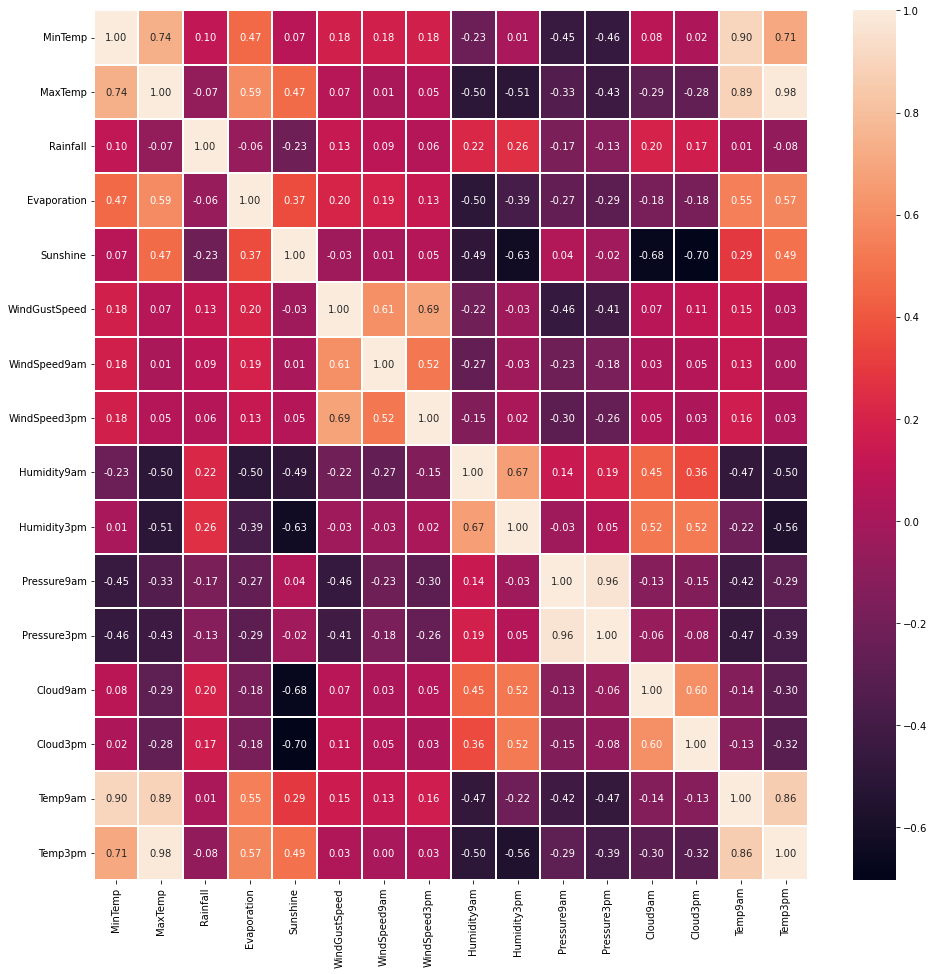

In [11]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.1, ax=ax);

On peut observer que la plupart des variables sont corrélées entres elles

## **DataViz**

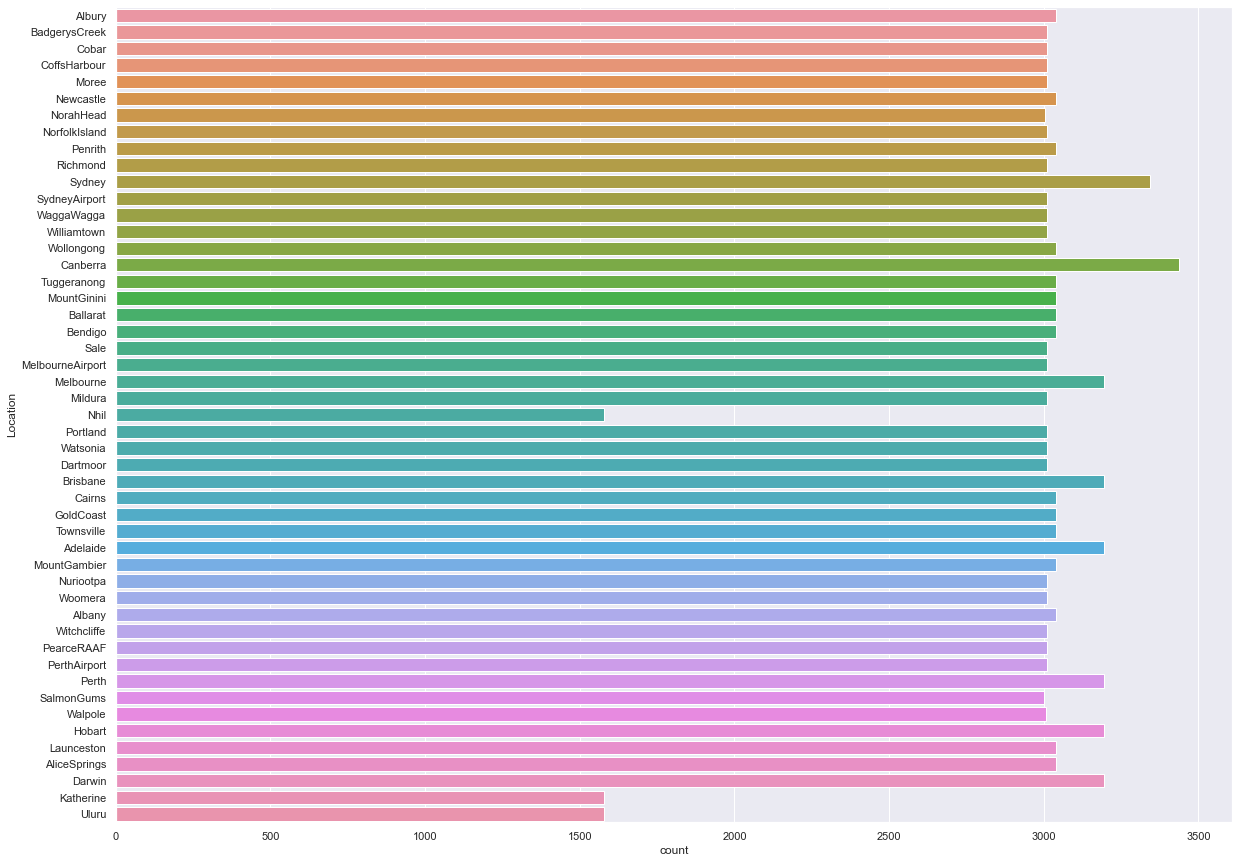

In [12]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,15)})

ax = sns.countplot(y="Location", data=df)

Toutes les villes repertoriées dans le dataset, le sont dans environ 3000 lignes ou plus à l'exception des villes de Nhil, Katherine et Uluru qui n'en ont que 1500.

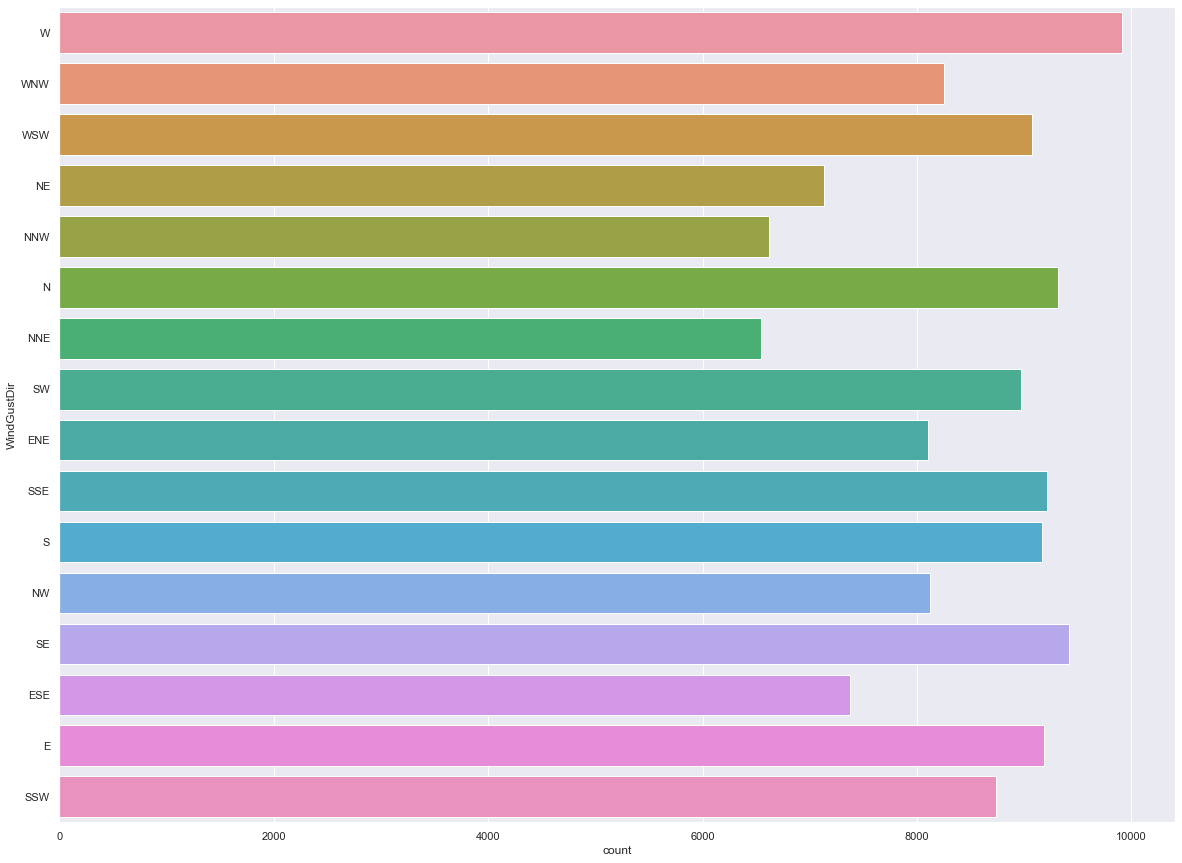

In [13]:
ax = sns.countplot(y="WindGustDir", data=df)

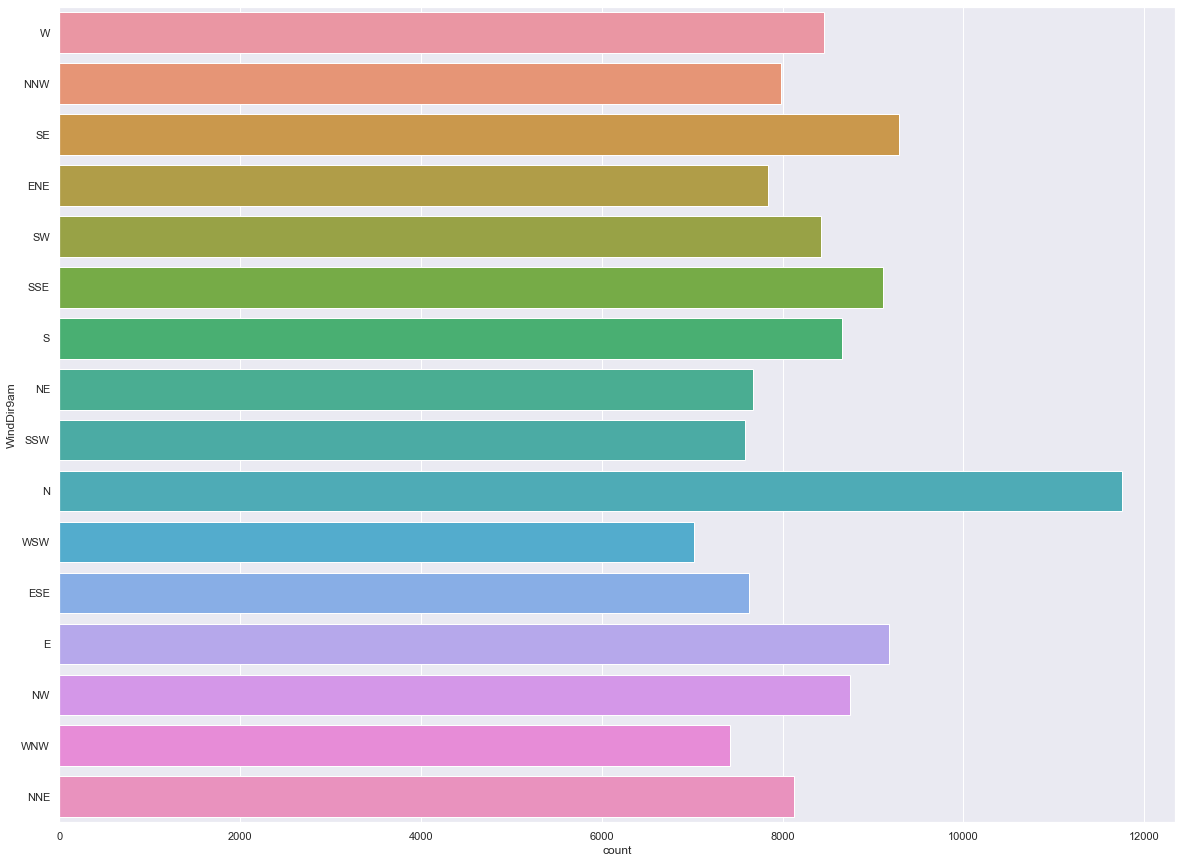

In [14]:
ax = sns.countplot(y="WindDir9am", data=df)

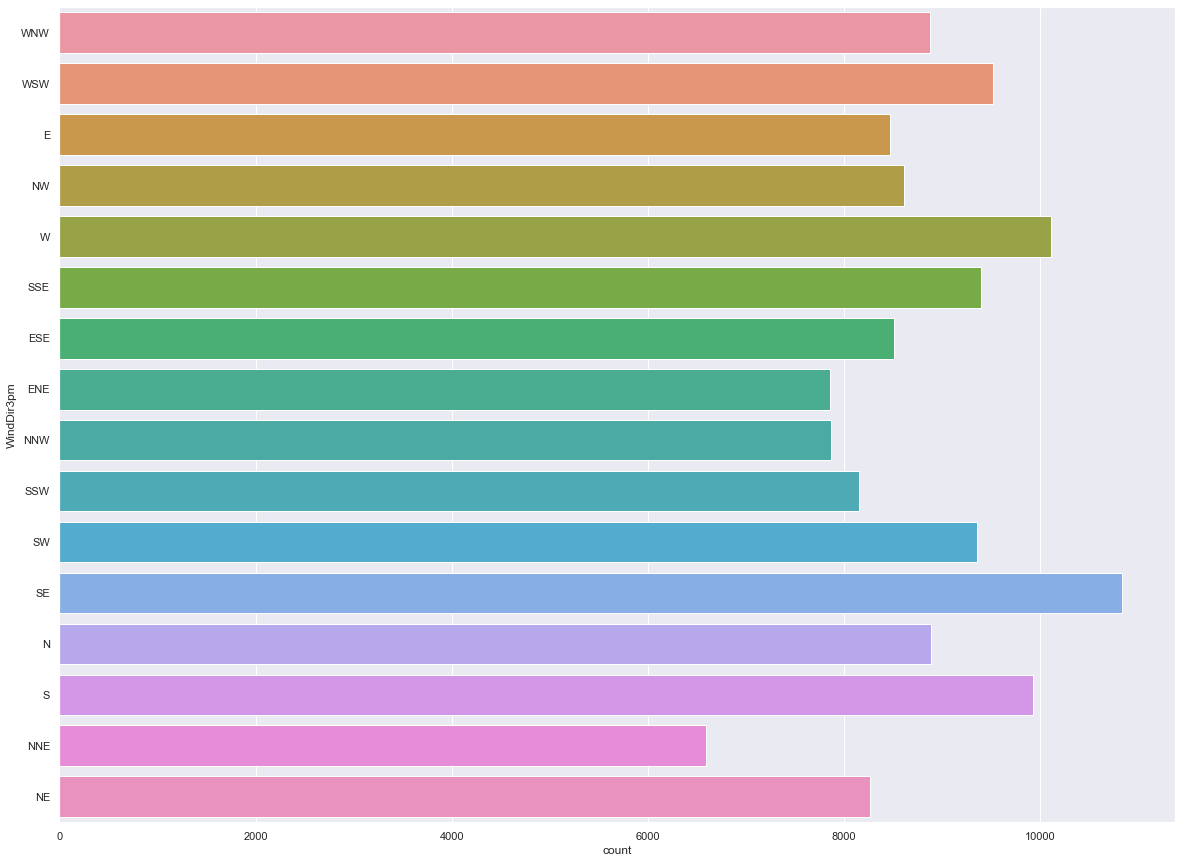

In [15]:
ax = sns.countplot(y="WindDir3pm", data=df)

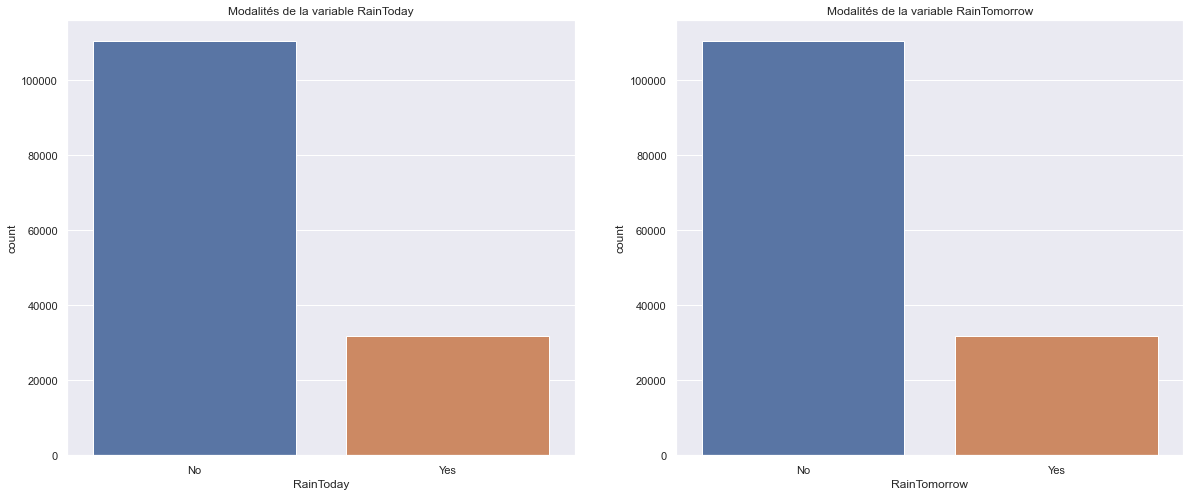

In [16]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.title(label='Modalités de la variable RainToday')
sns.countplot(x="RainToday", data=df)


plt.subplot(122)
plt.title(label='Modalités de la variable RainTomorrow')
sns.countplot(x="RainTomorrow", data=df);


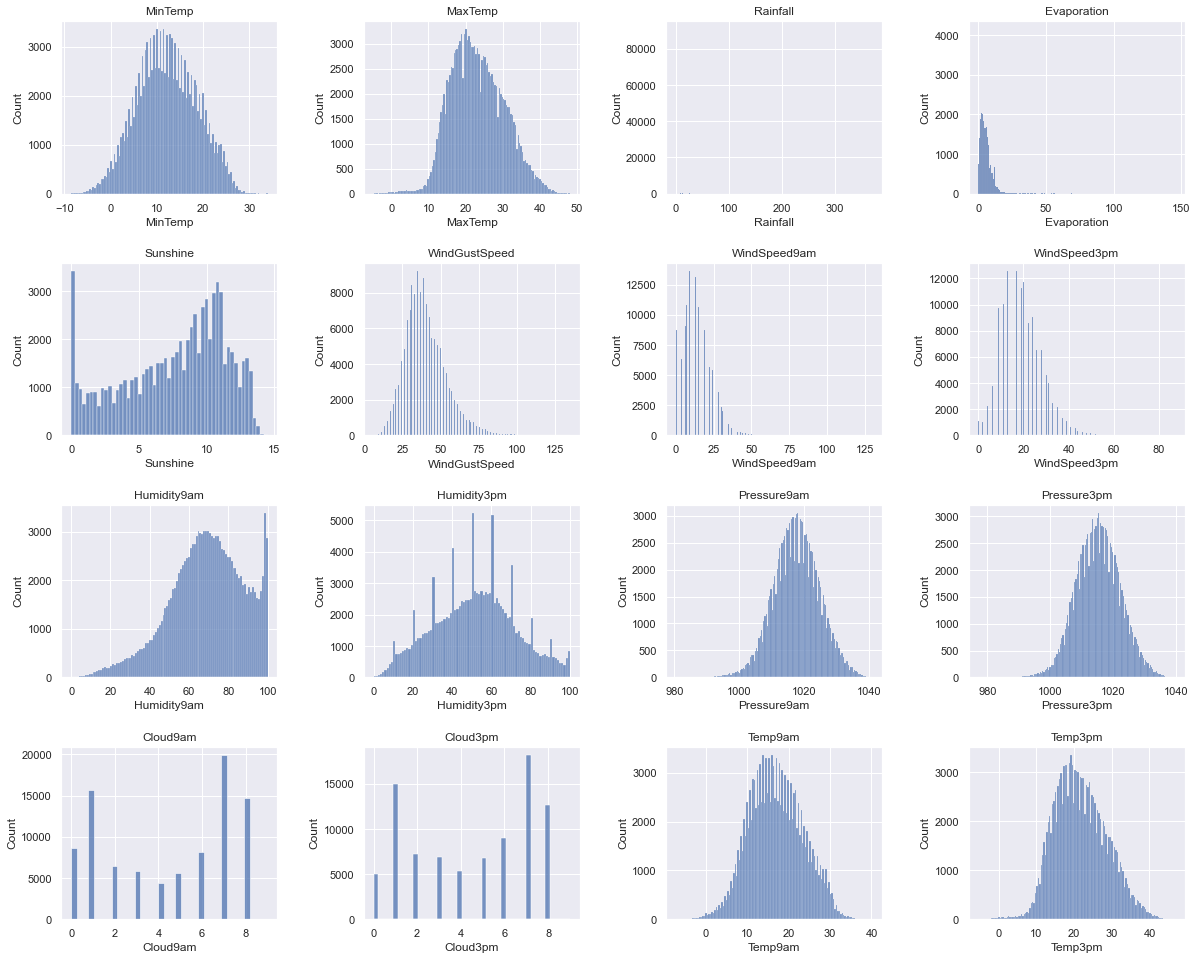

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_variable = df.select_dtypes(include=numerics)
plt.figure(figsize=(20, 16))

plt.subplots_adjust(left=0.12,
                    bottom=0.12, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i, column in enumerate(num_variable, 1):
    plt.subplot(4,4,i)
    sns.histplot(df[column]).set(title=column);


In [18]:
#séparation des  colonnes années/mois/jour
df['year'] = df['Date'].apply(lambda date : date.split('-')[0]).astype(int)
df['month'] = df['Date'].apply(lambda date : date.split('-')[1]).astype(int)
df['day'] = df['Date'].apply(lambda date : date.split('-')[2]).astype(int)

Text(0, 0.5, 'Température (°C) ')

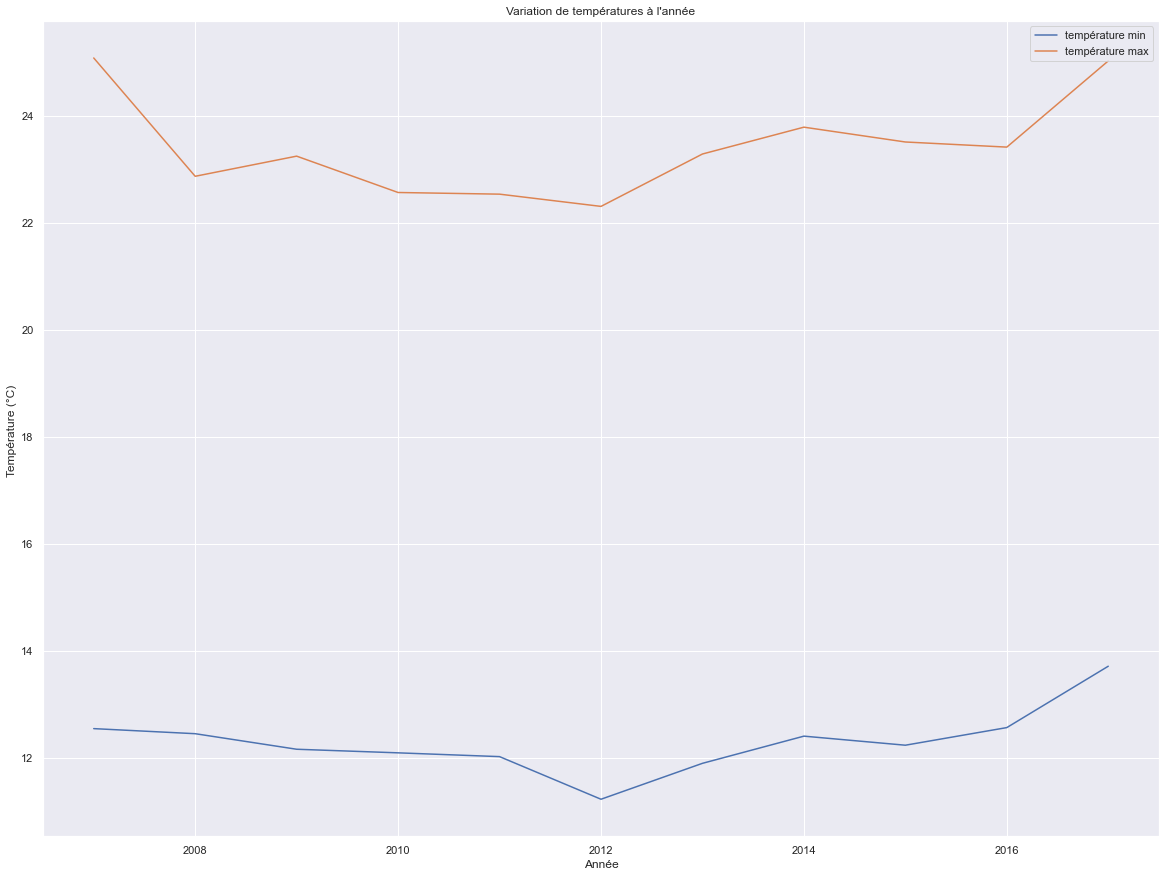

In [19]:
#graph visualisation évoluation de la temp min max sur 10 ans

sns.lineplot( x= 'year', y = 'MinTemp', label = 'température min', data = df.groupby('year').mean())
sns.lineplot( x= 'year', y = 'MaxTemp', label = 'température max', data = df.groupby('year').mean())
plt.title("Variation de températures à l'année")
plt.xlabel('Année')
plt.ylabel('Température (°C) ')

Text(0, 0.5, 'hydrométrie (mm)')

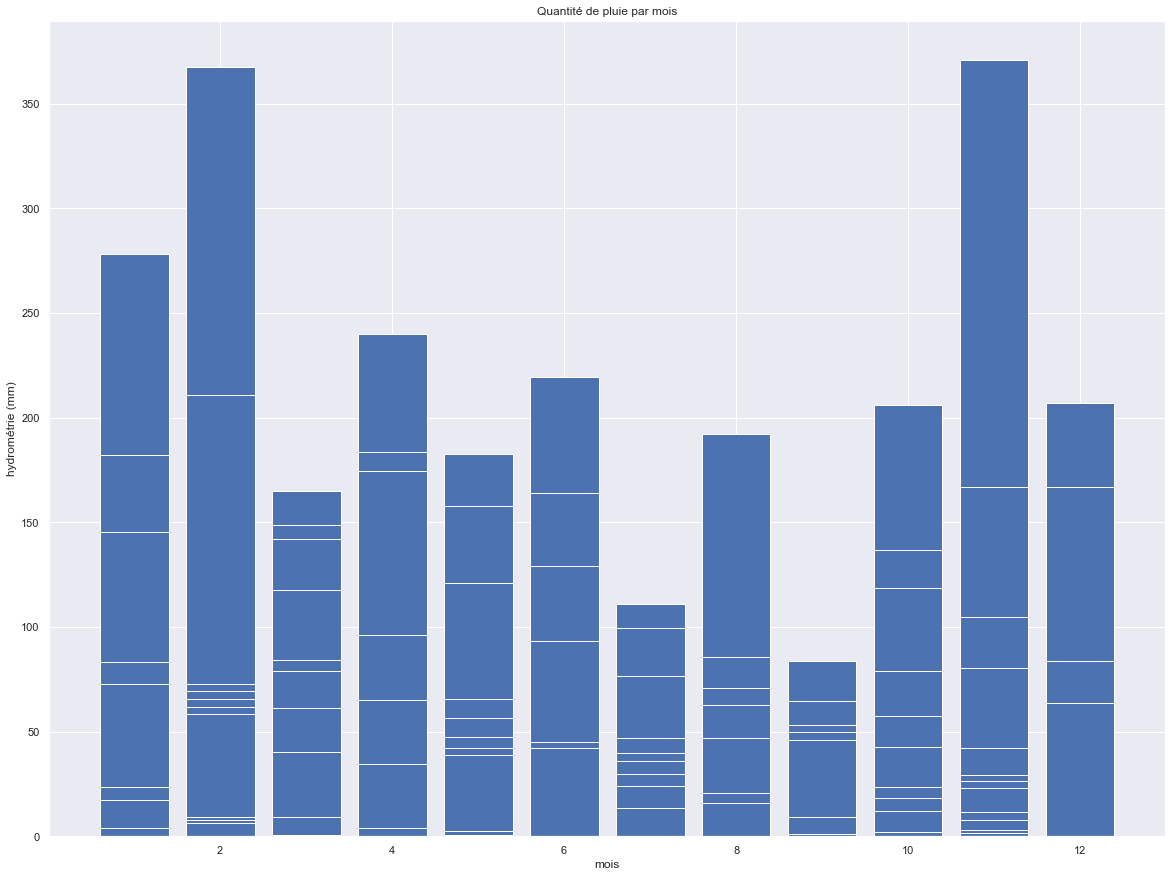

In [20]:
#graph visualisation hydrométrie sur 10 ans
plt.bar(df.month, df.Rainfall)
plt.title('Quantité de pluie par mois')
plt.xlabel('mois')
plt.ylabel('hydrométrie (mm)')

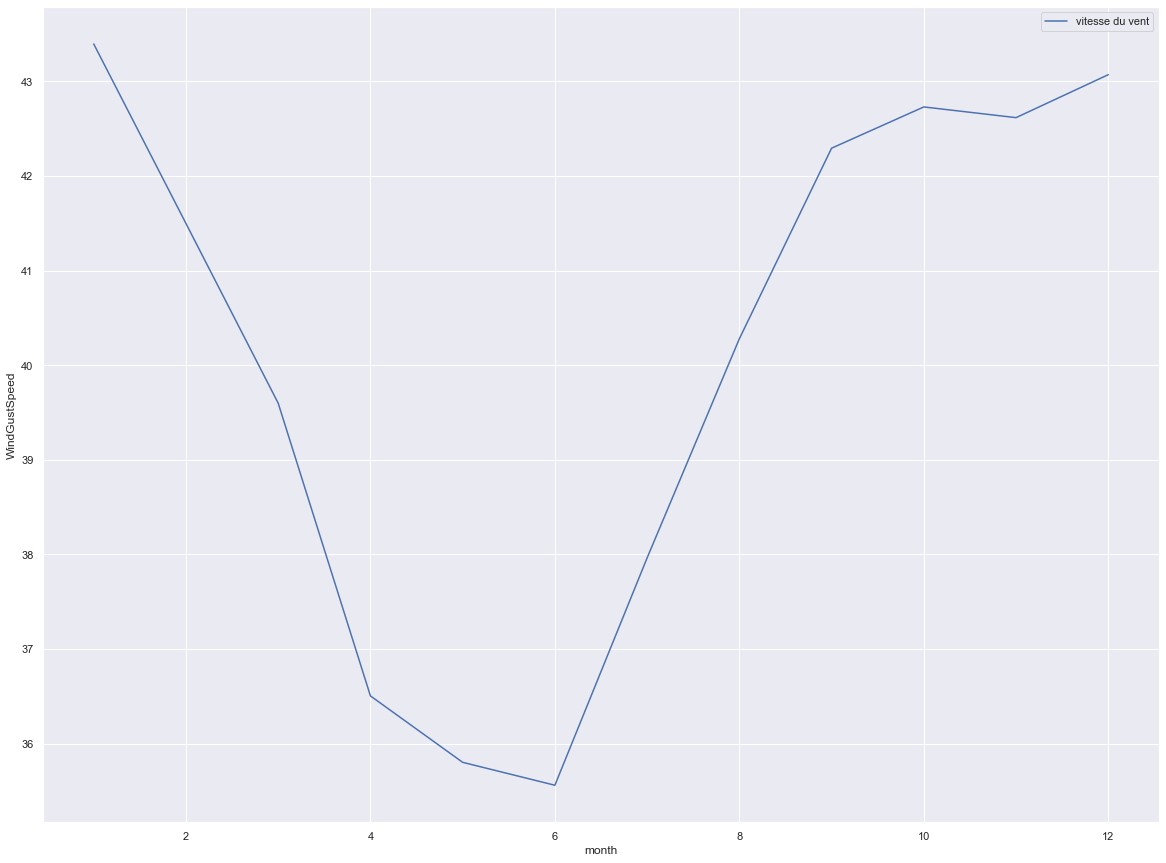

In [21]:
#Graph vitesse moyenne du vent en fonction du mois
sns.lineplot( x= 'month', y = 'WindGustSpeed', label = 'vitesse du vent', data = df.groupby('month').mean());

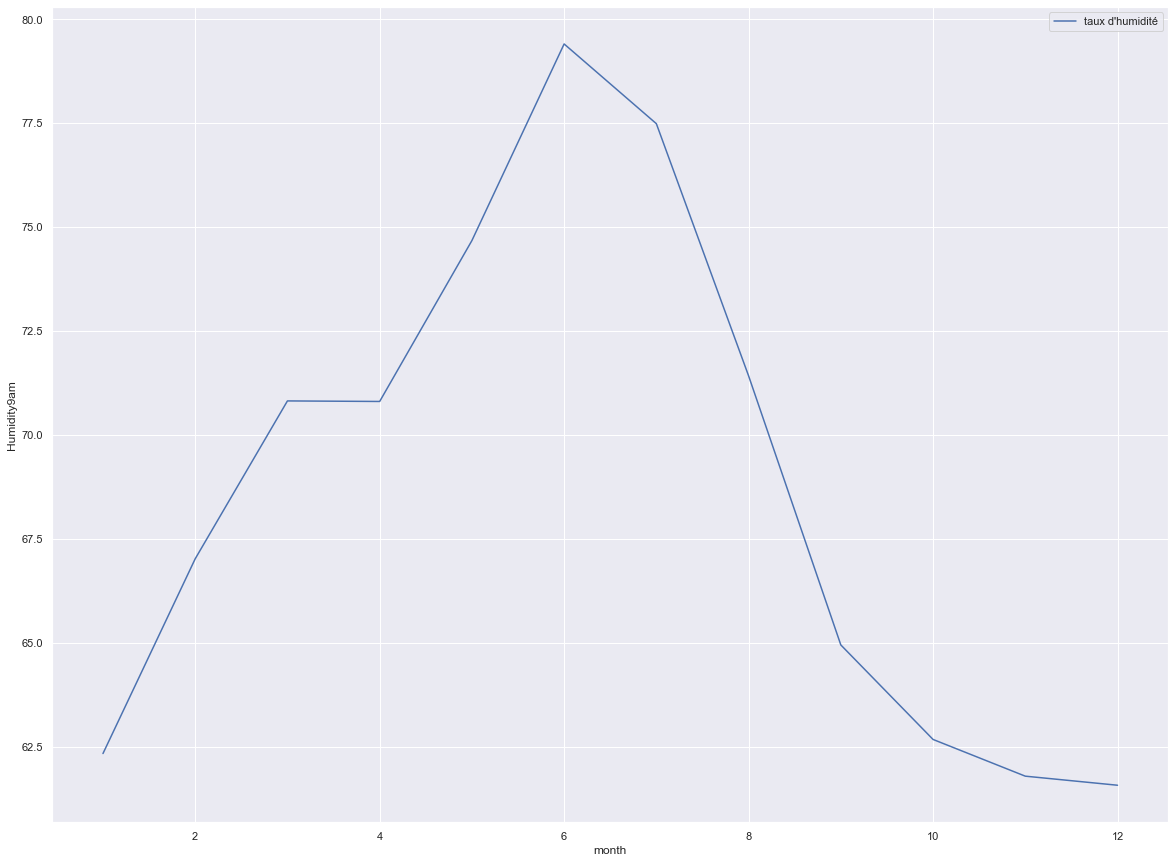

In [22]:
#Graph taux humidité moyen à l'année
sns.lineplot( x= 'month', y = 'Humidity9am', label = "taux d'humidité", data = df.groupby('month').mean());

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


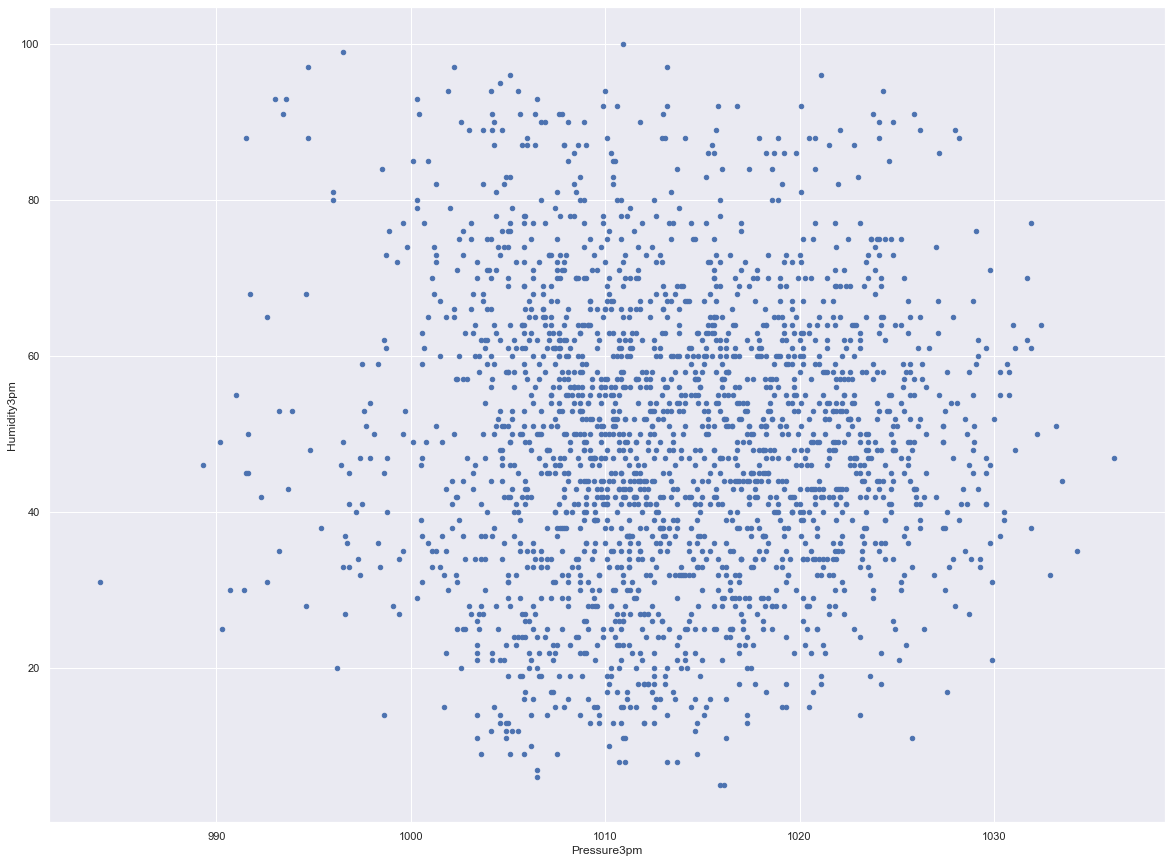

In [23]:
#Nuage de point : Taux d'humidté en fonction de la pression
df[df['year']==2008].plot.scatter(x='Pressure3pm', y = 'Humidity3pm');

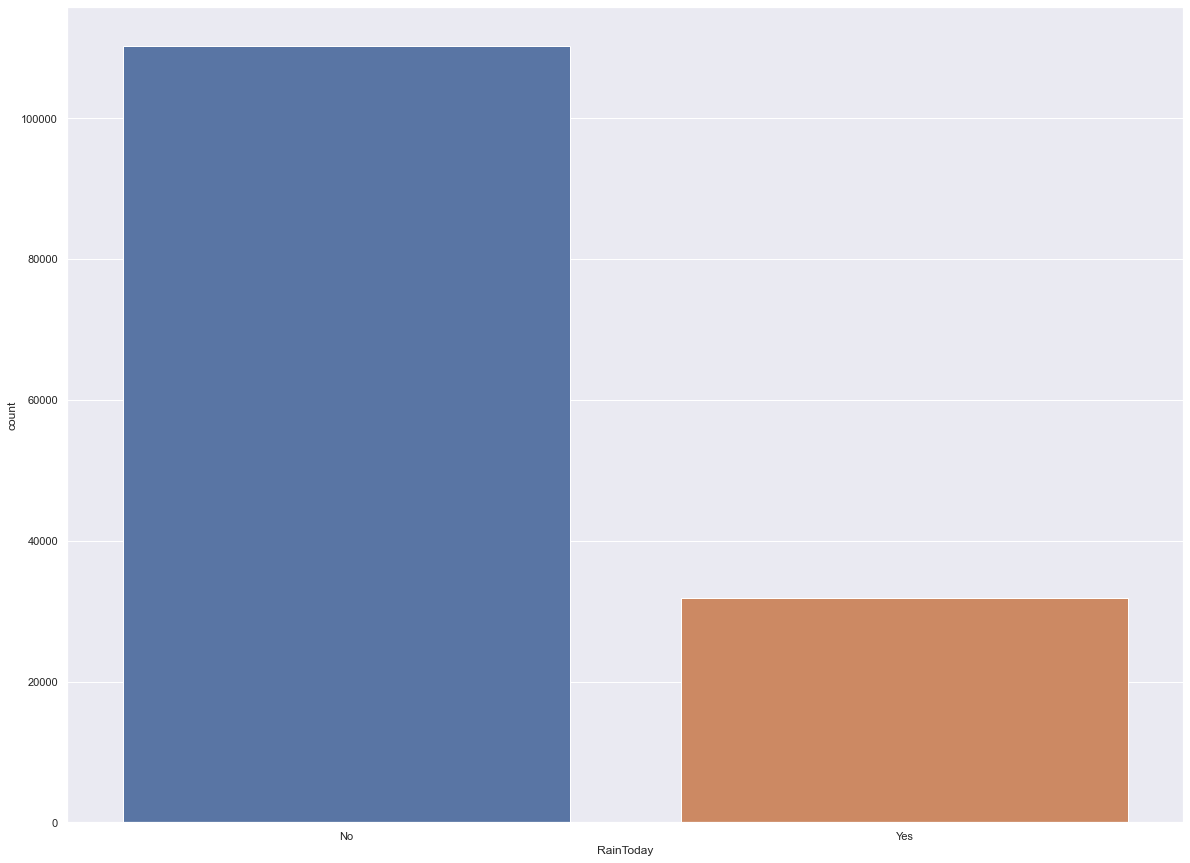

In [24]:
# pluie du jour :indique s'il a plu de plus de 1mm le jour de l'observation. 

sns.countplot(x='RainToday', data = df);

## Valeurs Manquantes

In [25]:
#Pourcentage de valeurs manquantes par variables

100 * df.isna().sum()/len(df)



Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
year              0.000000
month             0.000000
day               0.000000
dtype: float64

6 variables ont plus de 10 % de valeurs manquantes dont 4 avec des taux proches de 40% voire 50%

Les prédictions devant se faire par ville une analyse des valeurs manquantes par ville peut être pertinente

In [26]:
ville_na={}
for ville in df['Location'].unique():
  print(df[df['Location'] == ville].isna().any(axis=1).sum())
  ville_na[ville] = df[df['Location'] == ville].isna().any(axis=1).sum()

3040
3009
2475
1629
1096
3039
3004
545
3039
3009
1654
139
593
1811
3040
2358
3039
3040
3040
3040
1331
80
1295
415
1578
1146
279
3009
240
596
3040
621
3193
575
1001
1275
3040
3009
3009
96
168
3001
3006
1254
3040
817
131
1578
1578


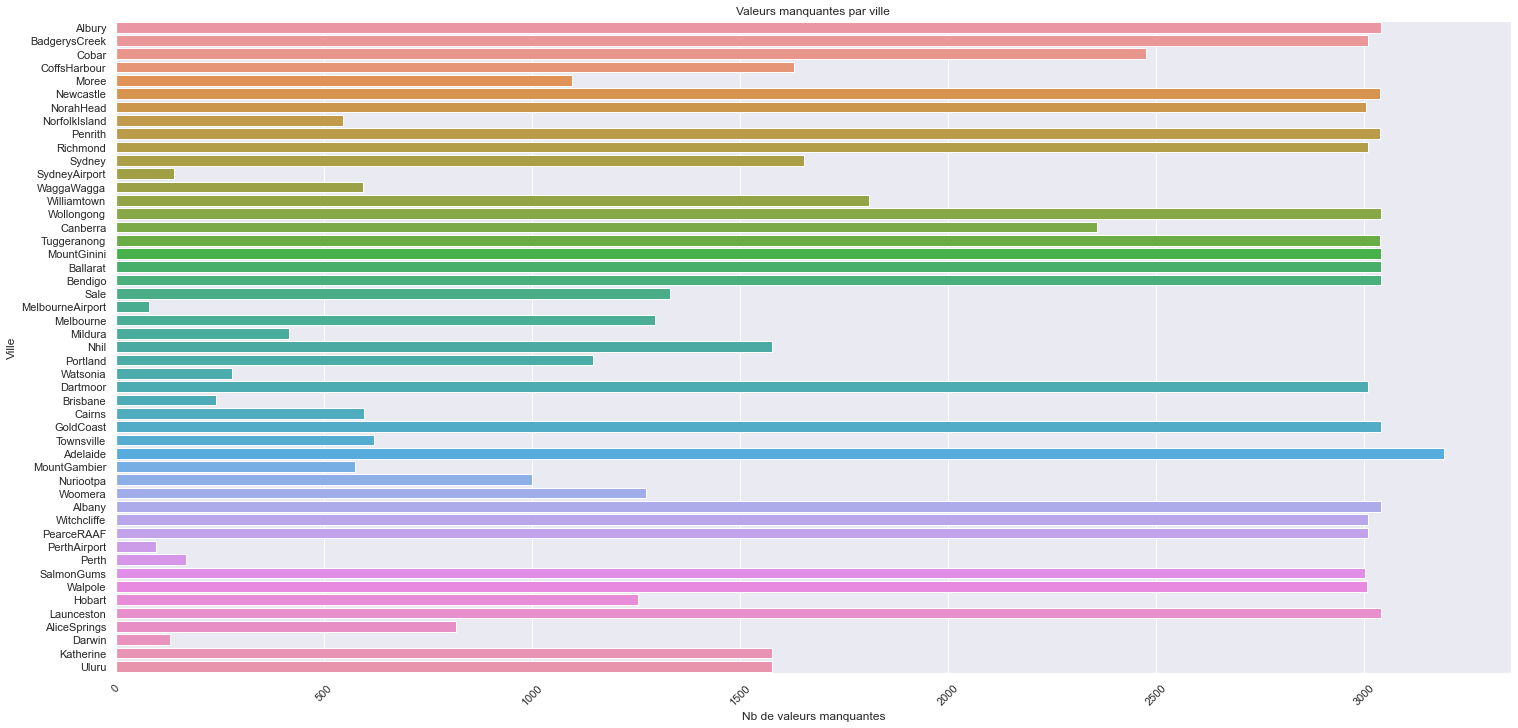

In [27]:
sns.set(rc={'figure.figsize':(25,12)})

my_df = pd.DataFrame(ville_na.items())
ax = sns.barplot(y=0, x=1, data=my_df)
ax.set(ylabel = 'Ville', xlabel='Nb de valeurs manquantes', title='Valeurs manquantes par ville')
plt.xticks(rotation=45);



```
# Ce texte est au format code
```

Première approche de suppression des valeurs manquantes : Par la moyenne pour les variables numériques et le mode pour les variables categorielles

In [28]:
#Remplacement des valeurs manquantes par la moyenne pour les variables quantitatives
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [29]:
#Remplacement des valeurs manquantes par lle mode pour les variables qualitativesàsq
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

Déséquilibre du jeu de données sur la variable RainTomorrow

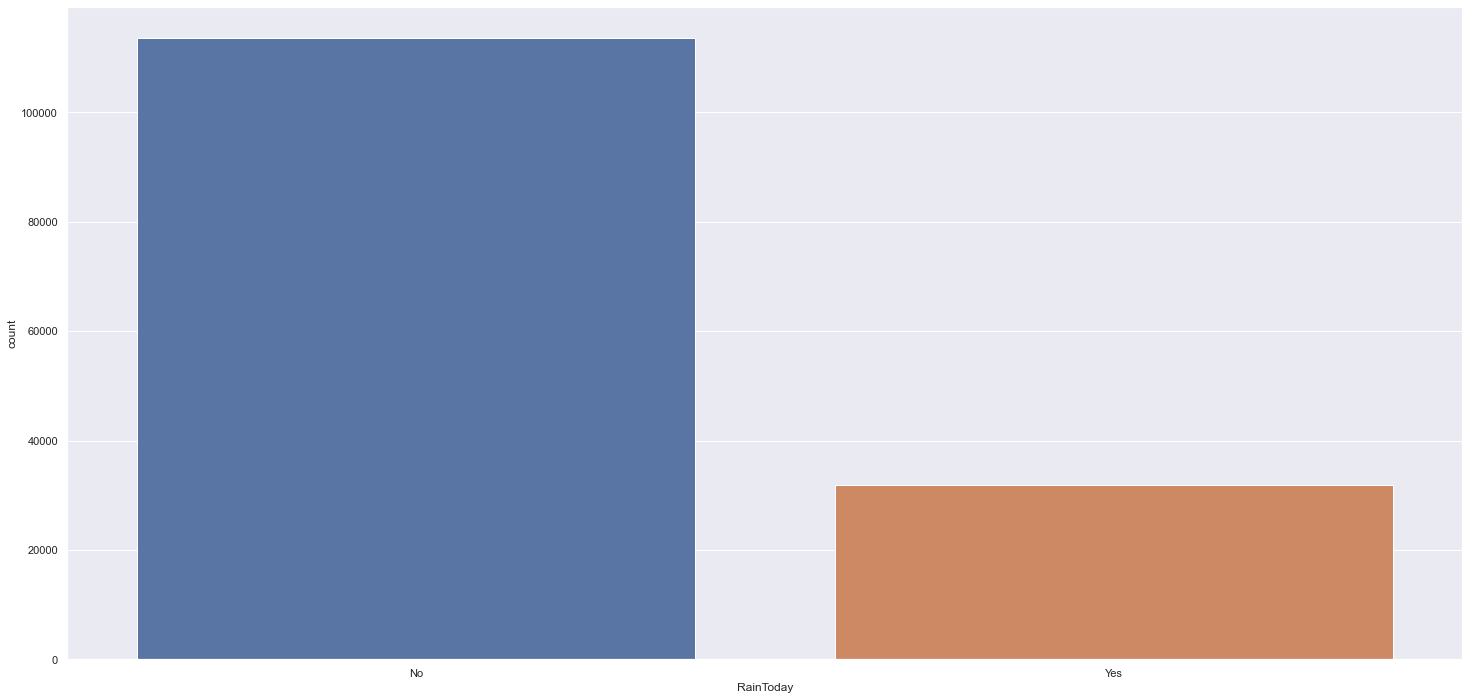

In [30]:
# Verification de l'équilibre du jeu de données

sns.countplot(x='RainTomorrow', data = df);
sns.countplot(x='RainToday', data = df);

Il apparait necessaire de rééquilibré le jeu de données au niveau de la variable cible avant le split du dataset

# Encodage et Vérification de l'équilibre du jeux de données

In [31]:
df_prepare = df.copy()

In [32]:
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,13.4,0.6,5.468232,7.611178,W,44.0,W,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,7.4,0.0,5.468232,7.611178,WNW,44.0,NNW,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,12.9,0.0,5.468232,7.611178,WSW,46.0,W,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,9.2,0.0,5.468232,7.611178,NE,24.0,SE,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,17.5,1.0,5.468232,7.611178,W,41.0,ENE,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


In [33]:
#transormation type de Date
df_prepare['Date'] = pd.to_datetime(df_prepare['Date'])

In [34]:
#Sération des colonnes de types catégorielles et numériques
date_columns = ['Date']
cat_columns = df_prepare.select_dtypes(include=['object']).columns
num_columns = df_prepare.select_dtypes(include=['float64', 'int64']).columns

In [35]:
print(cat_columns)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [36]:
cat_columns = cat_columns.drop(['RainToday','RainTomorrow'])

In [37]:
print(cat_columns)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')


In [38]:
#Encodages des variables catégorielles sauf pour RainToday, RainTomorrow
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_columns:
    df_prepare[i] = le.fit_transform(df_prepare[i])
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,2008-12-02,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,2008-12-03,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,2008-12-04,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,2008-12-05,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


In [39]:
# Remplace valeur de Rain pour 0 quand non, 1 quand oui
label_dict = {'No': 0,'Yes':1}
df_prepare['RainTomorrow'] = df_prepare['RainTomorrow'].map(label_dict)
df_prepare['RainToday'] = df_prepare['RainToday'].map(label_dict)

In [40]:
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [41]:
#enleve col date car on a séparé cette colonne en 3 et index car il n'a pas d'influence sur prédictions
df_prepare.drop(['Date'], axis=1, inplace=True)
df_prepare.reset_index(drop=True, inplace=True)

# Fonctions utiles

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def chargement_data():
#   from google.colab import drive
#   drive.mount('/content/drive')


  df = pd.read_csv('weatherAUS.csv')

  #Remplacement des valeurs manquantes par la moyenne pour les variables quantitatives
  df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
  df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
  df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
  df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
  df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
  df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
  df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
  df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
  df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
  df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
  df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
  df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
  df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
  df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
  df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
  df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

  #Remplacement des valeurs manquantes par lle mode pour les variables qualitativesàsq
  df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
  df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
  df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
  df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
  df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])



  return df

In [3]:
def chargement_data_time():
#   from google.colab import drive
#   drive.mount('/content/drive')


  df = pd.read_csv('weatherAUS.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) 

  #Remplacement des valeurs manquantes par la moyenne pour les variables quantitatives
  df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
  df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
  df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
  df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
  df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
  df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
  df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
  df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
  df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
  df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
  df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
  df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
  df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
  df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
  df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
  df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

  #Remplacement des valeurs manquantes par lle mode pour les variables qualitativesàsq
  df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
  df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
  df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
  df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
  df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])



  return df

In [4]:
def chargement_data():
#   from google.colab import drive
#   drive.mount('/content/drive')


  #df = pd.read_csv('/content/drive/MyDrive/Projet Meteo/weatherAUS.csv')
  df = pd.read_csv('weatherAUS.csv')

  #Remplacement des valeurs manquantes par la moyenne pour les variables quantitatives
  df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
  df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
  df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
  df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
  df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
  df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
  df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
  df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
  df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
  df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
  df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
  df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
  df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
  df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
  df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
  df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

  #Remplacement des valeurs manquantes par lle mode pour les variables qualitativesàsq
  df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
  df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
  df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
  df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
  df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])



  return df

In [5]:
def chargement_ville(choix_ville,df):
  df_prepare = df[df['Location'] == choix_ville]
  return df_prepare

In [6]:
def separation_colonnes(df_prepare):
  cat_columns = df_prepare.select_dtypes(include=['object']).columns
  num_columns = df_prepare.select_dtypes(include=['float64', 'int64']).columns
  return cat_columns,num_columns

In [7]:
def separation_colonnes_date(df_prepare):
  cat_columns = df_prepare.select_dtypes(include=['object']).columns
  num_columns = df_prepare.select_dtypes(include=['float64', 'int64']).columns
  cat_columns.drop('Date')
  return date_columns,cat_columns,num_columns

In [8]:
def encodage(df_prepare,cat_columns):
  
  cat_columns = cat_columns.drop(['RainToday','RainTomorrow'])

  #Encodages des variables catégorielles sauf pour RainToday, RainTomorrow
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  for i in cat_columns:
      df_prepare[i] = le.fit_transform(df_prepare[i])
  df_prepare.head()

  # Remplace valeur de Rain pour 0 quand non, 1 quand oui
  label_dict = {'No': 0,'Yes':1}
  df_prepare['RainTomorrow'] = df_prepare['RainTomorrow'].map(label_dict)


  df_prepare['RainToday'] = df_prepare['RainToday'].map(label_dict)

  df_prepare.head()
  return df_prepare

#Classification

## Baseline : DummyClassifier

In [50]:
#chargement et préparation des données
df = chargement_data()
df_prepare = chargement_ville('Darwin',df)
cat_columns, num_columns = separation_colonnes(df_prepare)
df_prepare = encodage(df_prepare,cat_columns)
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,0,0,20.0,20.0,0.0,4.4,11.0,0,41.0,1,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,0,0
139112,1,0,19.4,19.4,0.0,6.0,10.4,1,50.0,9,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,0,0
139113,2,0,18.2,18.2,0.0,8.0,11.0,0,46.0,2,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,0,0
139114,3,0,17.3,17.3,0.0,7.0,10.4,0,44.0,9,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,0,0
139115,4,0,15.5,15.5,0.0,7.0,10.8,2,46.0,0,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,0,0


In [51]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Séparation entre feature et cible
X = df_prepare.drop(columns=["RainTomorrow"], axis=1)
y = df_prepare["RainTomorrow"]

#séparation du jeu de donnée en train et test, on choisi 0.1 car cela représente 1 an de donnée ( 10 ans de données *0.1 = 1 an)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle = False)

#Normalisation
sc = MinMaxScaler()
X_train[num_columns] = sc.fit_transform(X_train[num_columns])
X_test[num_columns] = sc.transform(X_test[num_columns])

from sklearn.dummy import DummyClassifier
dummy_clf  = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
y_predict = dummy_clf.predict(X_test)
y_pred_prob=dummy_clf.predict_proba(X_test)[:,1]


In [52]:
#création tableau de comparaison des prédictions par rapport à la réalité
test_results = pd.DataFrame(data={'Test Predictions':y_predict, 'Réalité':y_test})
test_result= test_results.reset_index(drop=True)
test_result

,Test Predictions,Réalité
0,0,1
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
1592,0,0
1593,0,0
1594,0,0
1595,0,0


In [53]:
#rapport de classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("*"*10, "Classification Report", "*"*10)
print("-"*30)
print("Dummy classifier: \n ", classification_report(y_test, y_predict))
print("-"*30)

********** Classification Report **********
------------------------------
Dummy classifier: 
                precision    recall  f1-score   support

           0       0.74      1.00      0.85      1179
           1       0.00      0.00      0.00       418

    accuracy                           0.74      1597
   macro avg       0.37      0.50      0.42      1597
weighted avg       0.55      0.74      0.63      1597

------------------------------


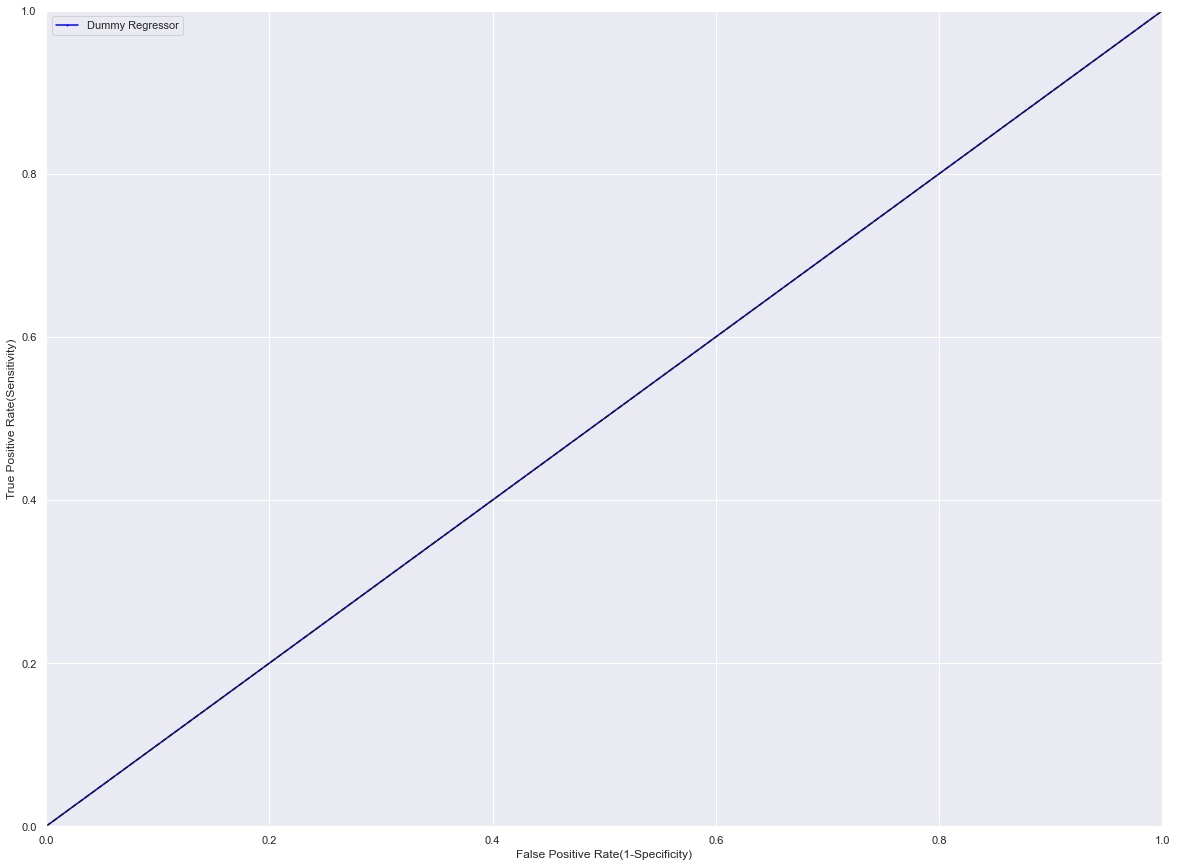

In [54]:
#courbe ROC
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

fpr_dumm, tpr_dumm, thresholds  = roc_curve(y_test, y_pred_prob)

plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(fpr_dumm, tpr_dumm, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Dummy Regressor")


plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

## Première itération: utilisation de modèles classiques

Préparation

In [55]:
#import et préparation des données
df = chargement_data()
df_prepare = chargement_ville('Darwin',df)
cat_columns, num_columns = separation_colonnes(df_prepare)
df_prepare = encodage(df_prepare,cat_columns)
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,0,0,20.0,20.0,0.0,4.4,11.0,0,41.0,1,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,0,0
139112,1,0,19.4,19.4,0.0,6.0,10.4,1,50.0,9,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,0,0
139113,2,0,18.2,18.2,0.0,8.0,11.0,0,46.0,2,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,0,0
139114,3,0,17.3,17.3,0.0,7.0,10.4,0,44.0,9,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,0,0
139115,4,0,15.5,15.5,0.0,7.0,10.8,2,46.0,0,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,0,0


In [56]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Séparation entre feature et cible
X = df_prepare.drop(columns=["RainTomorrow"], axis=1)
y = df_prepare["RainTomorrow"]

#séparation du jeu de donnée en train et test, on choisi 0.1 car cela représente 1 an de donnée ( 10 ans de données *0.1 = 1 an)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)

#Normalisation
sc = MinMaxScaler()
X_train[num_columns] = sc.fit_transform(X_train[num_columns])
X_test[num_columns] = sc.transform(X_test[num_columns])




In [57]:
#équilibrage par Oversampling : SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))

Classes échantillon SMOTE : {0: 2138, 1: 2138}


Modélisation

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Arbre de décision avec OverSampling
dtree = DecisionTreeClassifier()
dtree.fit(X_sm, y_sm)

y_dtree = dtree.predict(X_test)
y_dtree_prob=dtree.predict_proba(X_test)[:,1]

In [60]:
# Régression Logistique avec OverSampling
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_sm, y_sm)

y_lr = lr.predict(X_test)
y_lr_prob=lr.predict_proba(X_test)[:,1]

In [61]:
# Forêt Aléatoire avec OverSampling
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_sm, y_sm)

y_rf = rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]

In [62]:
from sklearn.svm import SVC  

# SVM avec OverSampling 
svm2 = SVC(probability=True)  
svm2.fit(X_sm, y_sm)  
y_svm = svm2.predict(X_test) 
y_svm_prob=svm2.predict_proba(X_test)[:,1]

Performance des modèles

In [63]:
#Comparaison des modèles avec Classification Report 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*10, "Classification Report", "*"*10)

print("-"*30)
print("Logistic Regression: ", classification_report(y_test, y_lr))
print("-"*30)


print("-"*30)
print("Decision Tree: ", classification_report(y_test, y_dtree))
print("-"*30)


print("-"*30)
print("Random Forest: ", classification_report(y_test, y_rf))
print("-"*30)
print("-"*30)

print("-"*30)
print("SVM : ", classification_report(y_test,y_svm))
print("-"*30)
print("-"*30)

********** Classification Report **********
------------------------------
Logistic Regression:                precision    recall  f1-score   support

           0       0.89      0.79      0.84       203
           1       0.69      0.83      0.75       117

    accuracy                           0.80       320
   macro avg       0.79      0.81      0.80       320
weighted avg       0.82      0.80      0.81       320

------------------------------
------------------------------
Decision Tree:                precision    recall  f1-score   support

           0       0.67      0.84      0.75       203
           1       0.50      0.27      0.35       117

    accuracy                           0.63       320
   macro avg       0.58      0.56      0.55       320
weighted avg       0.61      0.63      0.60       320

------------------------------
------------------------------
Random Forest:                precision    recall  f1-score   support

           0       0.86      0.87     

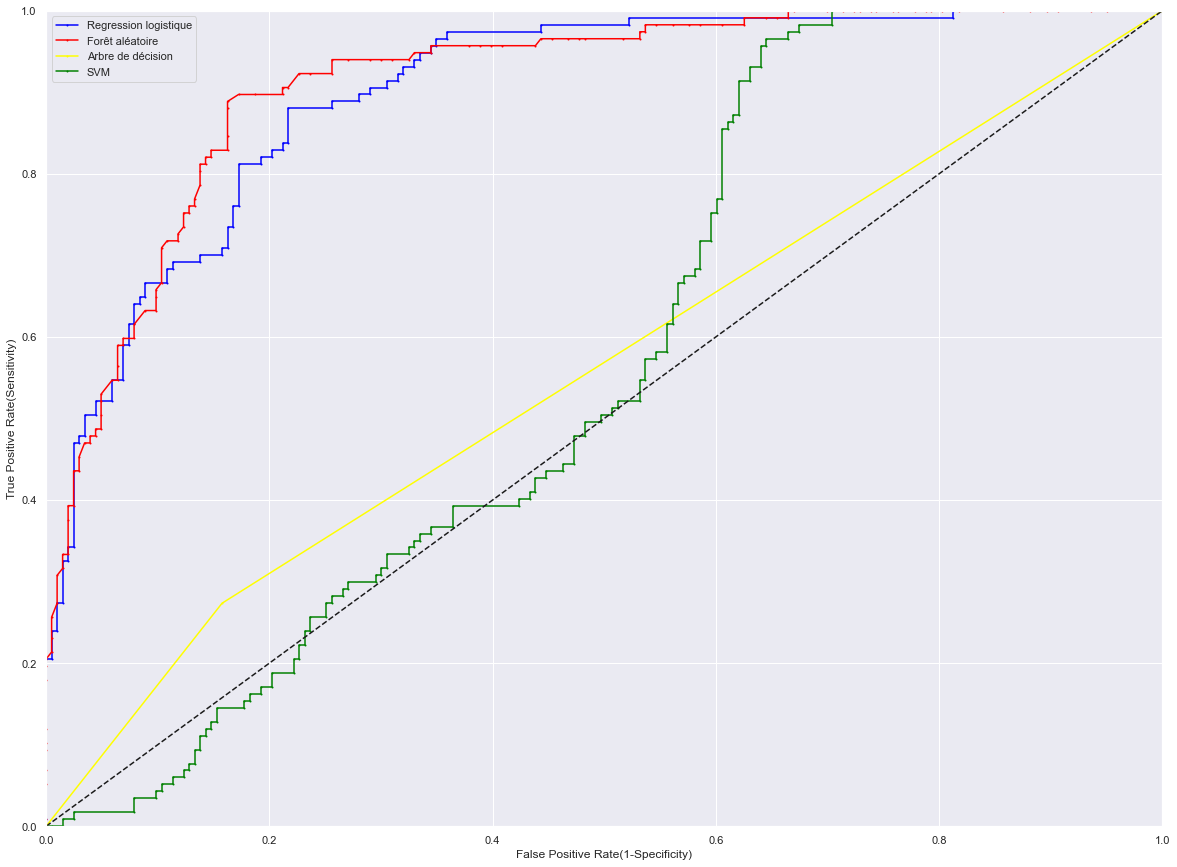

In [64]:
#création de la courbe ROC pour comparaison des modèles
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

fpr_lr, tpr_lr, thresholds  = roc_curve(y_test, y_lr_prob)
fpr_rf, tpr_rf, thresholds  = roc_curve(y_test, y_rf_prob)
fpr_dtree, tpr_dtree, thresholds  = roc_curve(y_test, y_dtree_prob)
fpr_svm, tpr_svm, thresholds  = roc_curve(y_test, y_svm_prob)

plt.rcParams['font.size'] = 12
plt.plot(fpr_lr, tpr_lr, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Regression logistique")
plt.plot(fpr_rf, tpr_rf, color = 'red', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Forêt aléatoire")
plt.plot(fpr_dtree, tpr_dtree, color = 'yellow', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Arbre de décision")
plt.plot(fpr_svm, tpr_svm, color = 'green', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "SVM")


plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

## Deuxième itération: amélioration du modèle Random forest

In [65]:
#import et préparation des données
df = chargement_data()
df_prepare = chargement_ville('Darwin',df)
df_prepare['Date'] = pd.to_datetime(df_prepare['Date'])
cat_columns, num_columns = separation_colonnes(df_prepare)
df_prepare = encodage(df_prepare,cat_columns)
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,2008-07-01,0,20.0,20.0,0.0,4.4,11.0,0,41.0,1,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,0,0
139112,2008-07-02,0,19.4,19.4,0.0,6.0,10.4,1,50.0,9,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,0,0
139113,2008-07-03,0,18.2,18.2,0.0,8.0,11.0,0,46.0,2,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,0,0
139114,2008-07-04,0,17.3,17.3,0.0,7.0,10.4,0,44.0,9,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,0,0
139115,2008-07-05,0,15.5,15.5,0.0,7.0,10.8,2,46.0,0,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,0,0


In [66]:
df_prepare.sort_values(['Location', 'Date'], ascending = [True, True])
df1 = pd.DataFrame()
for ville in pd.unique(df_prepare['Location']):
  df_ville = df_prepare[df_prepare['Location'] == ville]
  df_ville['Day - 1']=df_ville.RainToday.shift(1)
  df_ville['Day - 2']=df_ville.RainToday.shift(2)
  df_ville['Day - 3']=df_ville.RainToday.shift(3)
  df1 = pd.concat([df1, df_ville])

In [67]:
df_prepare = df1.copy()

In [68]:
df_prepare['Day - 1']=df_prepare['Day - 1'].fillna(df_prepare['Day - 1'].mode()[0])
df_prepare['Day - 2']=df_prepare['Day - 2'].fillna(df_prepare['Day - 2'].mode()[0])
df_prepare['Day - 3']=df_prepare['Day - 3'].fillna(df_prepare['Day - 3'].mode()[0])


In [69]:
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day - 1,Day - 2,Day - 3
139111,2008-07-01,0,20.0,20.0,0.0,4.4,11.0,0,41.0,1,...,1012.1,1.0,2.0,25.4,32.3,0,0,0.0,0.0,0.0
139112,2008-07-02,0,19.4,19.4,0.0,6.0,10.4,1,50.0,9,...,1012.4,1.0,1.0,24.3,31.9,0,0,0.0,0.0,0.0
139113,2008-07-03,0,18.2,18.2,0.0,8.0,11.0,0,46.0,2,...,1013.0,0.0,1.0,24.3,31.2,0,0,0.0,0.0,0.0
139114,2008-07-04,0,17.3,17.3,0.0,7.0,10.4,0,44.0,9,...,1013.6,2.0,6.0,21.3,29.8,0,0,0.0,0.0,0.0
139115,2008-07-05,0,15.5,15.5,0.0,7.0,10.8,2,46.0,0,...,1012.6,1.0,1.0,22.2,29.6,0,0,0.0,0.0,0.0


In [70]:
df_prepare['Day - 3'].value_counts()

0.0    2341
1.0     852
Name: Day - 3, dtype: int64

In [71]:
df_prepare['Date'] = pd.to_numeric(pd.to_datetime(df_prepare['Date']))

In [72]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_prepare[num_columns] = sc.fit_transform(df_prepare[num_columns])


In [73]:
#séparation du jeu de donnée en test train en respectant série temporelle
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

#X = df_prepare.to_numpy()
X = df_prepare.drop(columns=["RainTomorrow"], axis=1).to_numpy()
#X = df_prepare.drop(columns=["RainTomorrow"], axis=1)
y = df_prepare["RainTomorrow"].to_numpy()

for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)  

TRAIN: [   0    1    2 ... 1062 1063 1064] TEST: [1065 1066 1067 ... 2126 2127 2128]
TRAIN: [   0    1    2 ... 2126 2127 2128] TEST: [2129 2130 2131 ... 3190 3191 3192]


In [74]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.214870e+18,0.0,0.445903,0.445903,0.0,0.221053,0.894309,0.0,0.234234,1.0,...,0.856522,0.829897,0.125,0.250,0.561290,0.722826,0.0,0.0,0.0,0.0
1,1.214957e+18,0.0,0.411629,0.411629,0.0,0.305263,0.845528,1.0,0.315315,9.0,...,0.891304,0.845361,0.125,0.125,0.490323,0.701087,0.0,0.0,0.0,0.0
2,1.215043e+18,0.0,0.343081,0.343081,0.0,0.410526,0.894309,0.0,0.279279,2.0,...,0.908696,0.876289,0.000,0.125,0.490323,0.663043,0.0,0.0,0.0,0.0
3,1.215130e+18,0.0,0.291670,0.291670,0.0,0.357895,0.845528,0.0,0.261261,9.0,...,0.913043,0.907216,0.250,0.750,0.296774,0.586957,0.0,0.0,0.0,0.0
4,1.215216e+18,0.0,0.188848,0.188848,0.0,0.357895,0.878049,2.0,0.279279,0.0,...,0.869565,0.855670,0.125,0.125,0.354839,0.576087,0.0,0.0,0.0,0.0


In [75]:
#meilleur modèle : 
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
#cherche meilleurs paramètres

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

#créé dico de paramètre 
parameters = {'n_estimators':[0.1,1,10, 100, 1000], 'criterion':['gini','entropy', 'log_loss']} 

X = df_prepare.drop(columns=["RainTomorrow"], axis=1).to_numpy()
y = df_prepare["RainTomorrow"]


#Recherche avec GridCV
#grid = model_selection.GridSearchCV(estimator=model, param_grid=parameters, ) 
#grille = grid.fit(X_train,y_train) 
gsc = GridSearchCV(clf_rf, param_grid=parameters, cv=TimeSeriesSplit(n_splits=2))
grille = gsc.fit(X,y) 


# afficher toutes les combinaisons possibles d'hyperparamètres et la performance moyenne du modèle associé par validation croisée 
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])

                                             params  mean_test_score
0        {'criterion': 'gini', 'n_estimators': 0.1}              NaN
1          {'criterion': 'gini', 'n_estimators': 1}         0.803571
2         {'criterion': 'gini', 'n_estimators': 10}         0.837876
3        {'criterion': 'gini', 'n_estimators': 100}         0.859492
4       {'criterion': 'gini', 'n_estimators': 1000}         0.853383
5     {'criterion': 'entropy', 'n_estimators': 0.1}              NaN
6       {'criterion': 'entropy', 'n_estimators': 1}         0.789004
7      {'criterion': 'entropy', 'n_estimators': 10}         0.838816
8     {'criterion': 'entropy', 'n_estimators': 100}         0.858553
9    {'criterion': 'entropy', 'n_estimators': 1000}         0.857143
10   {'criterion': 'log_loss', 'n_estimators': 0.1}              NaN
11     {'criterion': 'log_loss', 'n_estimators': 1}              NaN
12    {'criterion': 'log_loss', 'n_estimators': 10}              NaN
13   {'criterion': 'log_loss', 'n_

In [77]:
clf_rf_opti= RandomForestClassifier(**gsc.best_params_)


In [78]:
clf_rf_opti.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
y_pred = clf_rf_opti.predict(X_test)

In [80]:
print("-"*30)
print("Random forest optimisé : \n ", classification_report(y_test, y_pred))
print("-"*30)

------------------------------
Random forest optimisé : 
                precision    recall  f1-score   support

           0       0.88      0.94      0.91       792
           1       0.79      0.62      0.70       272

    accuracy                           0.86      1064
   macro avg       0.84      0.78      0.80      1064
weighted avg       0.86      0.86      0.86      1064

------------------------------


In [81]:
y_rf_opt = clf_rf_opti.predict(X_test)
y_rf_opt_prob=clf_rf_opti.predict_proba(X_test)[:,1]

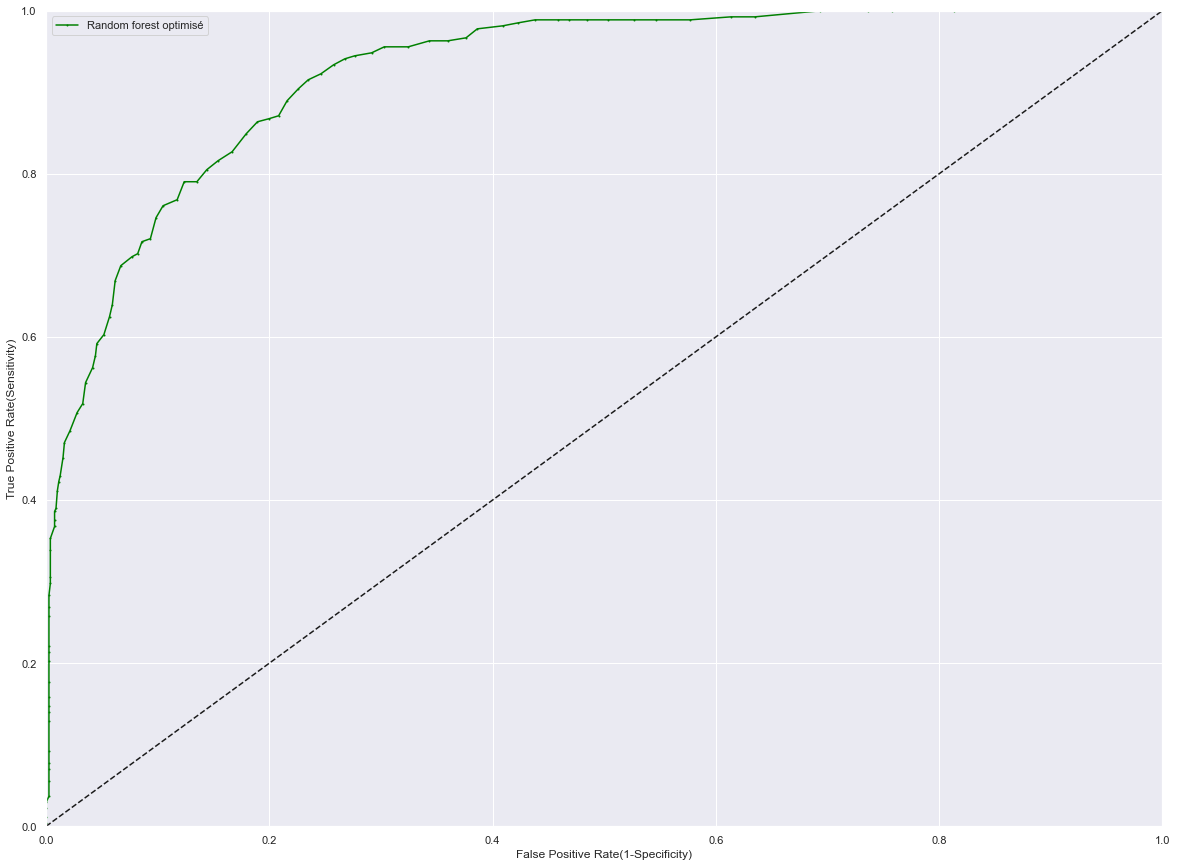

In [82]:
#création de la courbe ROC pour comparaison des modèles
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve


fpr_rf_opt, tpr_rf_opt, thresholds  = roc_curve(y_test, y_rf_opt_prob)


plt.rcParams['font.size'] = 12
plt.plot(fpr_rf_opt, tpr_rf_opt, color = 'green', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Random forest optimisé")


plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

On constate une dégradation des performances sur la classe 1 qui est la classe minoritaire. La difficulté à équilibrer un jeu de données temporel peut expliquer la baisse de performance. Le modèle Random Forest n'est pas le modèle le plus adapté aux séries temporelles. Pour améliorer les performances, on peut essayer de travailler sur des modèles par ville puis poursuivre sur un modèle SARIMAX pour tenter de prédire les températures sur une année.

## Troisième itération : approche par ville

Le but de cette approche est de tenter une prediction ville par ville car les données météo changent de façon importantes selon la localisation. Il serait donc plus interressant de vérifier si un modèle basé sur les villes donneraient de meilleurs resultats.

In [83]:
#import et préparation des données
df = chargement_data()
df_prepare = chargement_ville('Darwin',df)
cat_columns, num_columns = separation_colonnes(df_prepare)
df_prepare = encodage(df_prepare,cat_columns)
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,0,0,20.0,20.0,0.0,4.4,11.0,0,41.0,1,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,0,0
139112,1,0,19.4,19.4,0.0,6.0,10.4,1,50.0,9,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,0,0
139113,2,0,18.2,18.2,0.0,8.0,11.0,0,46.0,2,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,0,0
139114,3,0,17.3,17.3,0.0,7.0,10.4,0,44.0,9,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,0,0
139115,4,0,15.5,15.5,0.0,7.0,10.8,2,46.0,0,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,0,0


In [84]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Séparation entre feature et cible
X = df_prepare.drop(columns=["RainTomorrow"], axis=1)
y = df_prepare["RainTomorrow"]

#séparation du jeu de donnée en train et test, on choisi 0.1 car cela représente 1 an de donnée ( 10 ans de données *0.1 = 1 an)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)

#Normalisation
sc = MinMaxScaler()
X_train[num_columns] = sc.fit_transform(X_train[num_columns])
X_test[num_columns] = sc.transform(X_test[num_columns])




In [85]:
#équilibrage par Oversampling : SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))

Classes échantillon SMOTE : {0: 2138, 1: 2138}


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
# Arbre de décision avec OverSampling
dtree_ville = DecisionTreeClassifier()
dtree_ville.fit(X_sm, y_sm)

y_dtree_ville = dtree_ville.predict(X_test)
y_dtree_ville_prob=dtree_ville.predict_proba(X_test)[:,1]

In [88]:
# Régression Logistique avec OverSampling
lr_ville = LogisticRegression(max_iter = 2000)
lr_ville.fit(X_sm, y_sm)

y_lr_ville = lr_ville.predict(X_test)
y_lr_ville_prob=lr_ville.predict_proba(X_test)[:,1]

In [89]:
# Forêt Aléatoire avec OverSampling
rf_ville = RandomForestClassifier(n_estimators=400)
rf_ville.fit(X_sm, y_sm)

y_rf_ville = rf_ville.predict(X_test)
y_rf_ville_prob=rf_ville.predict_proba(X_test)[:,1]

In [90]:
from sklearn.svm import SVC  

# SVM avec OverSampling 
svm_ville = SVC(probability=True)  
svm_ville.fit(X_sm, y_sm)  
y_svm_ville = svm_ville.predict(X_test) 
y_svm_ville_prob=svm_ville.predict_proba(X_test)[:,1]

In [91]:
#Comparaison des modèles avec Classification Report 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*10, "Classification Report", "*"*10)

print("-"*30)
print("Logistic Regression: ", classification_report(y_test, y_lr_ville))
print("-"*30)


print("-"*30)
print("Decision Tree: ", classification_report(y_test, y_dtree_ville))
print("-"*30)


print("-"*30)
print("Random Forest: ", classification_report(y_test, y_rf_ville))
print("-"*30)
print("-"*30)

print("-"*30)
print("SVM : ", classification_report(y_test,y_svm_ville))
print("-"*30)
print("-"*30)

********** Classification Report **********
------------------------------
Logistic Regression:                precision    recall  f1-score   support

           0       0.91      0.78      0.84       203
           1       0.70      0.86      0.77       117

    accuracy                           0.81       320
   macro avg       0.80      0.82      0.81       320
weighted avg       0.83      0.81      0.82       320

------------------------------
------------------------------
Decision Tree:                precision    recall  f1-score   support

           0       0.75      0.77      0.76       203
           1       0.59      0.56      0.58       117

    accuracy                           0.70       320
   macro avg       0.67      0.67      0.67       320
weighted avg       0.69      0.70      0.70       320

------------------------------
------------------------------
Random Forest:                precision    recall  f1-score   support

           0       0.85      0.86     

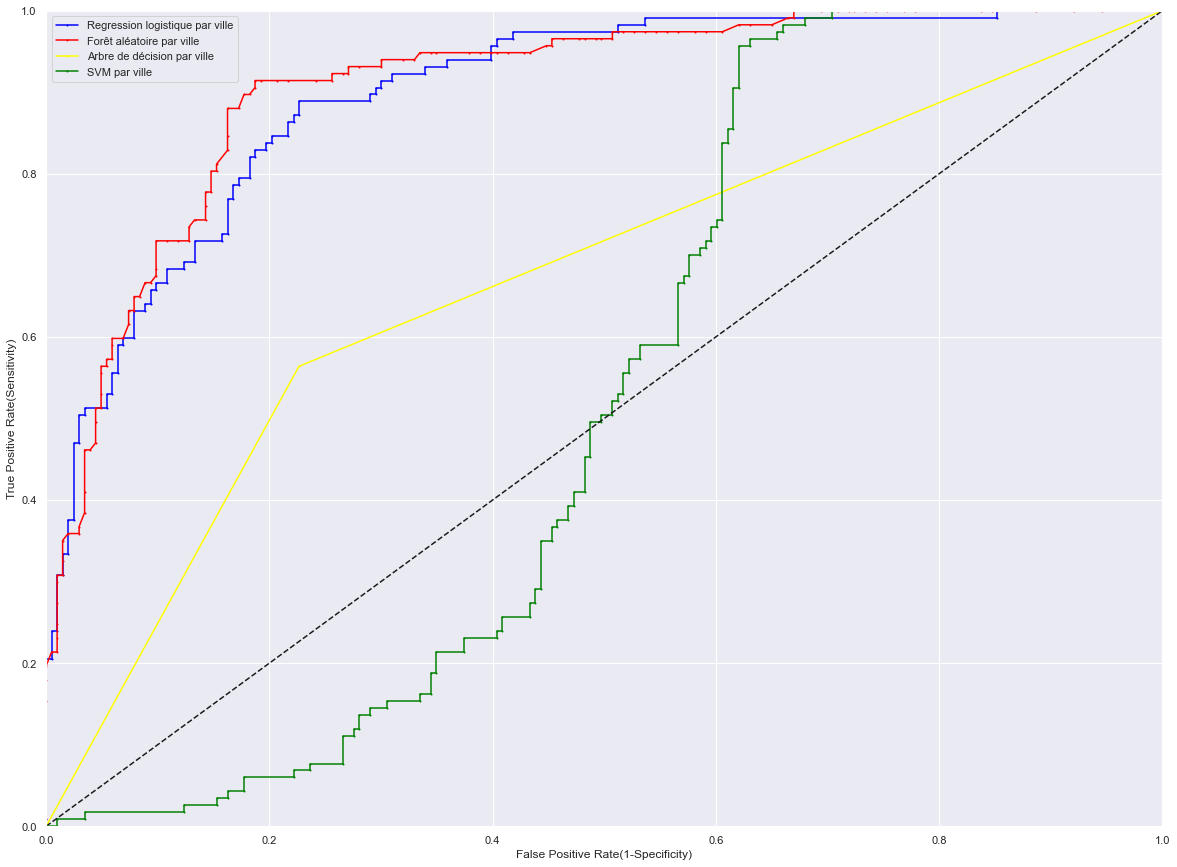

In [92]:
#création de la courbe ROC pour comparaison des modèles
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

fpr_lr_ville, tpr_lr_ville, thresholds  = roc_curve(y_test, y_lr_ville_prob)
fpr_rf_ville, tpr_rf_ville, thresholds  = roc_curve(y_test, y_rf_ville_prob)
fpr_dtree_ville, tpr_dtree_ville, thresholds  = roc_curve(y_test, y_dtree_ville_prob)
fpr_svm_ville, tpr_svm_ville, thresholds  = roc_curve(y_test, y_svm_ville_prob)

plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(fpr_lr_ville, tpr_lr_ville, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Regression logistique par ville")
plt.plot(fpr_rf_ville, tpr_rf_ville, color = 'red', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Forêt aléatoire par ville")
plt.plot(fpr_dtree_ville, tpr_dtree_ville, color = 'yellow', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Arbre de décision par ville")
plt.plot(fpr_svm_ville, tpr_svm_ville, color = 'green', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "SVM par ville")


plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

On aperçoit un gain marqué de performance sur la classe 1 pour les raisons évoquées en introduction de cette approche.

##Quatrième itération :  approche perceptron multicouches

### MLPClassifier de Scikit-Learn

In [93]:
#import et préparation des données
df = chargement_data()
df_prepare = chargement_ville('Darwin',df)
cat_columns, num_columns = separation_colonnes(df_prepare)
df_prepare = encodage(df_prepare,cat_columns)
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,0,0,20.0,20.0,0.0,4.4,11.0,0,41.0,1,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,0,0
139112,1,0,19.4,19.4,0.0,6.0,10.4,1,50.0,9,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,0,0
139113,2,0,18.2,18.2,0.0,8.0,11.0,0,46.0,2,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,0,0
139114,3,0,17.3,17.3,0.0,7.0,10.4,0,44.0,9,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,0,0
139115,4,0,15.5,15.5,0.0,7.0,10.8,2,46.0,0,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,0,0


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Séparation entre feature et cible
X = df_prepare.drop(columns=["RainTomorrow"], axis=1)
y = df_prepare["RainTomorrow"]


#Normalisation
sc = MinMaxScaler()
X[num_columns] = sc.fit_transform(X[num_columns])


In [95]:
#séparation du jeu de donnée en test train en respectant série temporelle
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

#X = df_prepare.to_numpy()
X = df_prepare.drop(columns=["RainTomorrow"], axis=1).to_numpy()
#X = df_prepare.drop(columns=["RainTomorrow"], axis=1)
y = df_prepare["RainTomorrow"].to_numpy()

for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


TRAIN: [   0    1    2 ... 1062 1063 1064] TEST: [1065 1066 1067 ... 2126 2127 2128]
TRAIN: [   0    1    2 ... 2126 2127 2128] TEST: [2129 2130 2131 ... 3190 3191 3192]


In [96]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve


mlp_clf_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('clf', MLPClassifier())
])

In [97]:
mlp_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', MLPClassifier())])

********** Classification Report **********
------------------------------
MLPClassifier: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       792
           1       0.73      0.70      0.71       272

    accuracy                           0.86      1064
   macro avg       0.81      0.81      0.81      1064
weighted avg       0.86      0.86      0.86      1064

------------------------------


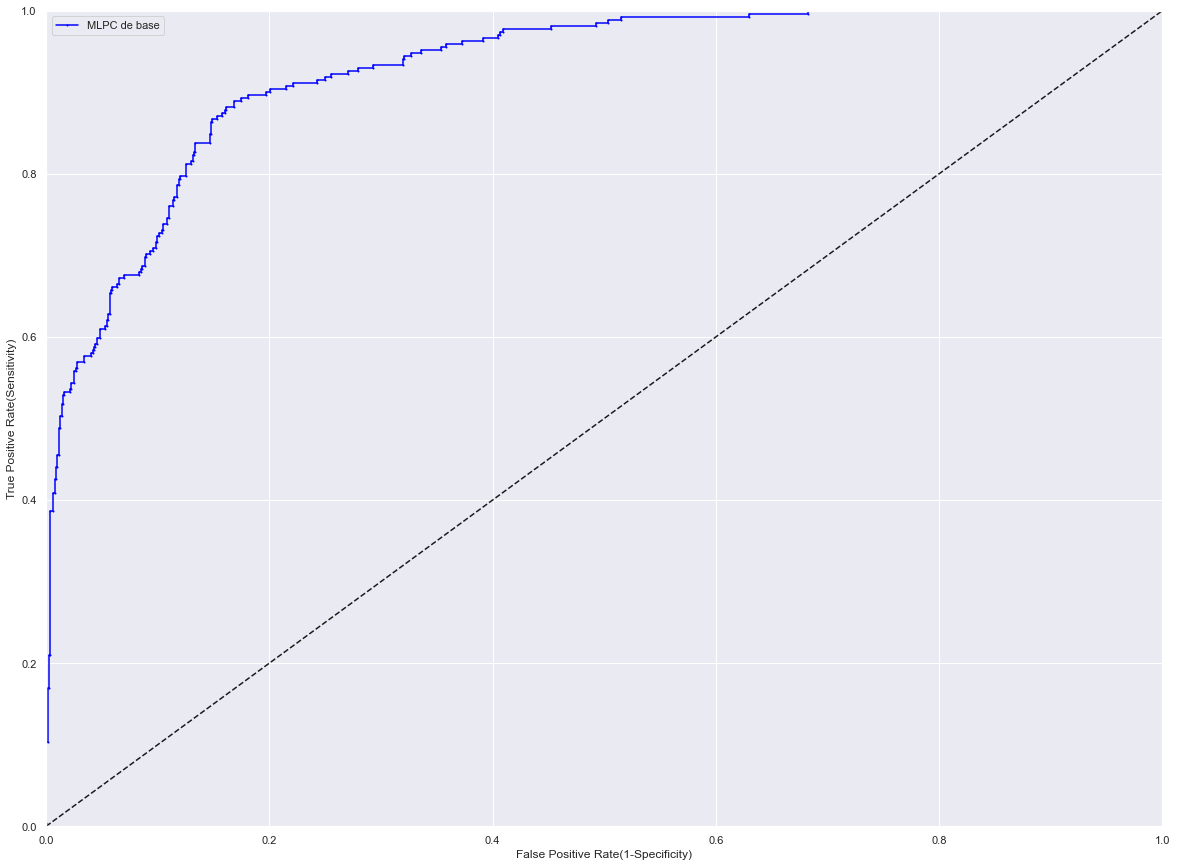

In [98]:
y_pred = mlp_clf_pipe.predict(X_test)
y_pred_prob=mlp_clf_pipe.predict_proba(X_test)[:,1]


print("*"*10, "Classification Report", "*"*10)

print("-"*30)
print("MLPClassifier: \n", classification_report(y_test, y_pred))
print("-"*30)

fpr_mlpc, tpr_mlpc, thresholds  = roc_curve(y_test, y_pred_prob)


plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(fpr_mlpc, tpr_mlpc, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "MLPC de base")


plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
from sklearn.metrics import recall_score
mlp = MLPClassifier()
parameter_space = {
    'max_iter': [500,1000,1500,2000],
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','softmax','sigmoid'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'random_state' : [42]
}

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
#return {'tn': cm[0, 0], 'fp': cm[0, 1],
#          'fn': cm[1, 0], 'tp': cm[1, 1]}
def confusion_matrix_scorer(clf, X, y):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  return cm[1, 0]
#clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring = 'recall_macro')
#clf.fit(X_train,y_train)

scoring = {'AUCe': 'roc_auc', 'Accuracy': 'accuracy', 'prec':  'precision', 'rec': 'recall', 'f1s': 'f1','spec':make_scorer(recall_score,pos_label=0)}

clf = GridSearchCV(estimator=mlp, param_grid=parameter_space, n_jobs=-1, cv=5, scoring=scoring, refit='Accuracy')
clf.fit(X_train,y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)



Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'adam'}


In [100]:

mlp_clf_pipe_opti = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('clf', MLPClassifier(**clf.best_params_))
])

In [101]:
mlp_clf_pipe_opti.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 MLPClassifier(activation='tanh', alpha=0.05, max_iter=500,
                               random_state=42))])

********** Classification Report **********
------------------------------
MLPClassifier: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       792
           1       0.72      0.72      0.72       272

    accuracy                           0.86      1064
   macro avg       0.81      0.81      0.81      1064
weighted avg       0.86      0.86      0.86      1064

------------------------------


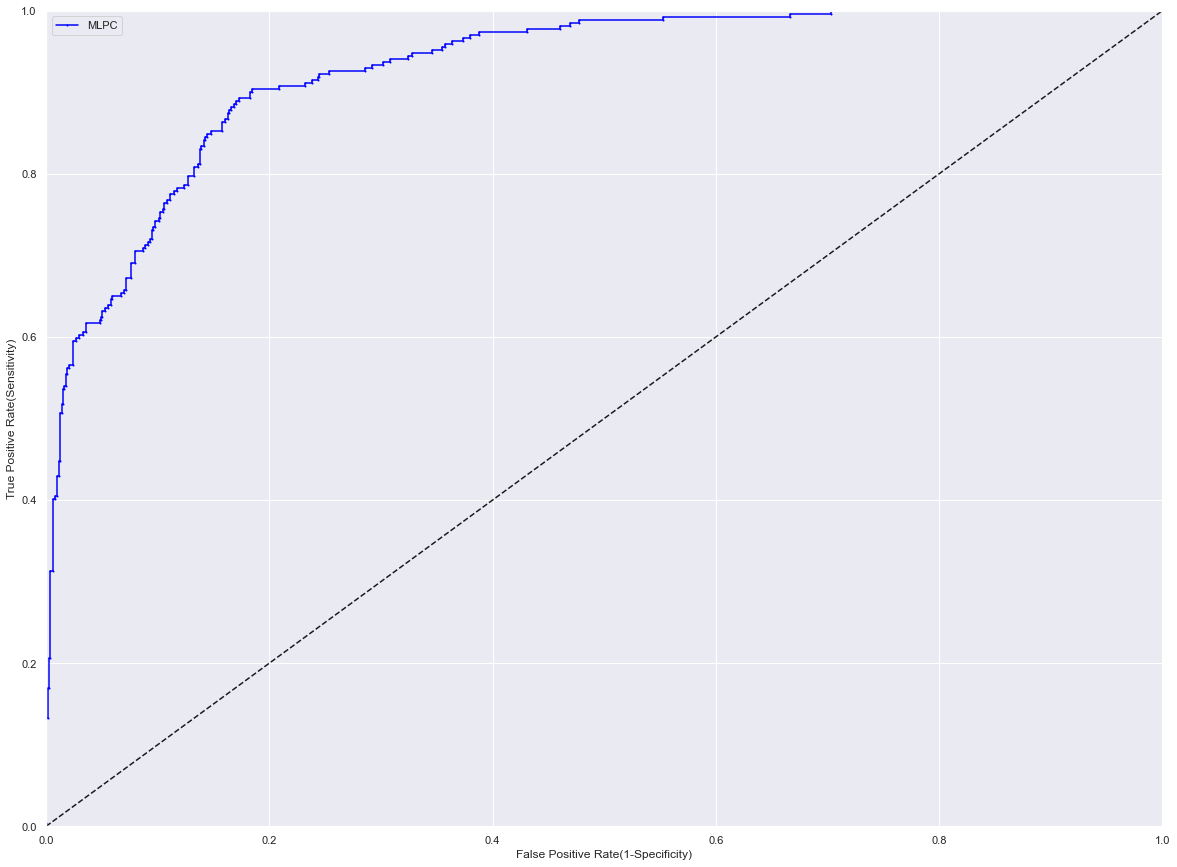

In [102]:
y_pred = mlp_clf_pipe_opti.predict(X_test)
y_pred_prob=mlp_clf_pipe_opti.predict_proba(X_test)[:,1]


print("*"*10, "Classification Report", "*"*10)

print("-"*30)
print("MLPClassifier: \n", classification_report(y_test, y_pred))
print("-"*30)

fpr_mlpc_opt, tpr_mlpc_opt, thresholds  = roc_curve(y_test, y_pred_prob)


plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(fpr_mlpc_opt, tpr_mlpc_opt, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "MLPC")


plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()


### DNNClassifierV2 de Tensorflow

In [103]:
#import et préparation des données
df = chargement_data()
df_prepare = chargement_ville('Darwin',df)
cat_columns, num_columns = separation_colonnes(df_prepare)
df_prepare = encodage(df_prepare,cat_columns)
df_prepare.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,0,0,20.0,20.0,0.0,4.4,11.0,0,41.0,1,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,0,0
139112,1,0,19.4,19.4,0.0,6.0,10.4,1,50.0,9,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,0,0
139113,2,0,18.2,18.2,0.0,8.0,11.0,0,46.0,2,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,0,0
139114,3,0,17.3,17.3,0.0,7.0,10.4,0,44.0,9,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,0,0
139115,4,0,15.5,15.5,0.0,7.0,10.8,2,46.0,0,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,0,0


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Séparation entre feature et cible
X = df_prepare.drop(columns=["RainTomorrow"], axis=1)
y = df_prepare["RainTomorrow"]


#Normalisation
sc = MinMaxScaler()
X[num_columns] = sc.fit_transform(X[num_columns])


In [105]:
#séparation du jeu de donnée en test train en respectant série temporelle
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)


X = df_prepare.drop(columns=["RainTomorrow"], axis=1)
y = df_prepare["RainTomorrow"]

X_train, y_train = X[:2700], y[:2700]
X_val, y_val = X[2700:2850], y[2700:2850]
X_test, y_test = X[2850:], y[2850:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape, X.shape



((2700, 22), (2700,), (150, 22), (150,), (343, 22), (343,), (3193, 22))

In [106]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np
import pandas as pd

In [107]:
#transformation des variables en tensor
Date = tf.feature_column.numeric_column('Date')
Location = tf.feature_column.numeric_column('Location')
MinTemp = tf.feature_column.numeric_column('MinTemp')
MaxTemp = tf.feature_column.numeric_column('MaxTemp')
Rainfall = tf.feature_column.numeric_column('Rainfall')
Evaporation = tf.feature_column.numeric_column('Evaporation')
Sunshine = tf.feature_column.numeric_column('Sunshine')
WindGustDir = tf.feature_column.numeric_column('WindGustDir')
WindGustSpeed = tf.feature_column.numeric_column('WindGustSpeed')
WindDir9am = tf.feature_column.numeric_column('WindDir9am')
WindDir3pm = tf.feature_column.numeric_column('WindDir3pm')
WindSpeed9am = tf.feature_column.numeric_column('WindSpeed9am')
WindSpeed3pm = tf.feature_column.numeric_column('WindSpeed3pm')
Humidity9am = tf.feature_column.numeric_column('Humidity9am')
Humidity3pm = tf.feature_column.numeric_column('Humidity3pm')
Pressure9am = tf.feature_column.numeric_column('Pressure9am')
Pressure3pm = tf.feature_column.numeric_column('Pressure3pm')
Cloud9am = tf.feature_column.numeric_column('Cloud9am')
Cloud3pm = tf.feature_column.numeric_column('Cloud3pm')
Temp9am = tf.feature_column.numeric_column('Temp9am')
Temp3pm = tf.feature_column.numeric_column('Temp3pm')
RainToday = tf.feature_column.numeric_column('RainToday')



In [108]:
#creéation d'un vecteur de tensor
feature_col=[Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm,
       Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday]

In [109]:
#activation des traces lors de l'exécution du modèle
import logging
logging.getLogger().setLevel(logging.INFO)
from tensorflow_estimator.python.estimator.canned.dnn import DNNClassifier
optimizer_adam= tf.optimizers.Adam(learning_rate=0.01)
DNNC=tf.estimator.DNNClassifier([8,4], feature_columns=feature_col, optimizer=optimizer_adam)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\latti\\AppData\\Local\\Temp\\tmpmrnzkwwh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [110]:
 #création du dataset train
 def train_input_fn(features, labels, batch_size):

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)

    # Return the dataset.
    return dataset

In [111]:
#création du dataset eval
def eval_input_fn(features, labels, batch_size):
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

In [112]:
#ajoute les feats dans le tableau
my_feature_columns = []

for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [113]:
#exécute classifieur
import logging
logging.getLogger().setLevel(logging.INFO)
clf_dnn = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[64,64,64,22,22,22],
    n_classes=2)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\latti\\AppData\\Local\\Temp\\tmpms_72uec', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [114]:
#entrainement du modèle
import logging
logging.getLogger().setLevel(logging.INFO)
clf_dnn.train(
    input_fn=lambda:train_input_fn(X_train, y_train, 16),steps=100000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\latti\AppData\Local\Temp\tmpms_72uec\model.ckpt.
INFO:tensorflow:C:\Users\latti\AppData\Local\Temp\tmpms_72uec\model.ckpt-0.data-00000-of-00001
INFO:tensorflow:100
INFO:tensorflow:C:\Users\latti\AppData\Local\Temp\tmpms_72uec\model.ckpt-0.index
INFO:tensorflow:100
INFO:tensorflow:C:\Users\latti\AppData\Local\Temp\tmpms_72uec\model.ckpt-0.meta
INFO:tensorflow:800

INFO:tensorflow:loss = 0.29112983, step = 6700 (0.481 sec)
INFO:tensorflow:global_step/sec: 213.987
INFO:tensorflow:loss = 0.2821085, step = 6800 (0.467 sec)
INFO:tensorflow:global_step/sec: 212.104
INFO:tensorflow:loss = 0.29676366, step = 6900 (0.471 sec)
INFO:tensorflow:global_step/sec: 254.96
INFO:tensorflow:loss = 0.3224811, step = 7000 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.968
INFO:tensorflow:loss = 0.41008186, step = 7100 (0.398 sec)
INFO:tensorflow:global_step/sec: 285.176
INFO:tensorflow:loss = 0.111022845, step = 7200 (0.349 sec)
INFO:tensorflow:global_step/sec: 355.547
INFO:tensorflow:loss = 0.29076743, step = 7300 (0.281 sec)
INFO:tensorflow:global_step/sec: 375.714
INFO:tensorflow:loss = 0.3764915, step = 7400 (0.265 sec)
INFO:tensorflow:global_step/sec: 371.487
INFO:tensorflow:loss = 0.17598104, step = 7500 (0.270 sec)
INFO:tensorflow:global_step/sec: 342.072
INFO:tensorflow:loss = 0.3211306, step = 7600 (0.292 sec)
INFO:tensorflow:global_step/sec: 298.257
INFO

INFO:tensorflow:loss = 0.12749794, step = 14900 (0.485 sec)
INFO:tensorflow:global_step/sec: 252.986
INFO:tensorflow:loss = 0.3498552, step = 15000 (0.393 sec)
INFO:tensorflow:global_step/sec: 267.926
INFO:tensorflow:loss = 0.36408702, step = 15100 (0.374 sec)
INFO:tensorflow:global_step/sec: 268.652
INFO:tensorflow:loss = 0.31516758, step = 15200 (0.372 sec)
INFO:tensorflow:global_step/sec: 274.314
INFO:tensorflow:loss = 0.26206705, step = 15300 (0.364 sec)
INFO:tensorflow:global_step/sec: 286.122
INFO:tensorflow:loss = 0.54196745, step = 15400 (0.350 sec)
INFO:tensorflow:global_step/sec: 266.117
INFO:tensorflow:loss = 0.1860772, step = 15500 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.707
INFO:tensorflow:loss = 0.37885395, step = 15600 (0.379 sec)
INFO:tensorflow:global_step/sec: 270.901
INFO:tensorflow:loss = 0.4087941, step = 15700 (0.370 sec)
INFO:tensorflow:global_step/sec: 276.825
INFO:tensorflow:loss = 0.15850836, step = 15800 (0.361 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 355.36
INFO:tensorflow:loss = 0.39323846, step = 23100 (0.281 sec)
INFO:tensorflow:global_step/sec: 356.222
INFO:tensorflow:loss = 0.25465968, step = 23200 (0.282 sec)
INFO:tensorflow:global_step/sec: 355.324
INFO:tensorflow:loss = 0.3742623, step = 23300 (0.280 sec)
INFO:tensorflow:global_step/sec: 255.946
INFO:tensorflow:loss = 0.49161166, step = 23400 (0.393 sec)
INFO:tensorflow:global_step/sec: 368.691
INFO:tensorflow:loss = 0.17473286, step = 23500 (0.270 sec)
INFO:tensorflow:global_step/sec: 306.592
INFO:tensorflow:loss = 0.3704939, step = 23600 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.149
INFO:tensorflow:loss = 0.34997132, step = 23700 (0.324 sec)
INFO:tensorflow:global_step/sec: 355.252
INFO:tensorflow:loss = 0.28034195, step = 23800 (0.280 sec)
INFO:tensorflow:global_step/sec: 300.216
INFO:tensorflow:loss = 0.36285928, step = 23900 (0.336 sec)
INFO:tensorflow:global_step/sec: 286.856
INFO:tensorflow:loss = 0.4199559, step = 24000 (0.347

INFO:tensorflow:global_step/sec: 374.551
INFO:tensorflow:loss = 0.6147061, step = 31300 (0.268 sec)
INFO:tensorflow:global_step/sec: 353.869
INFO:tensorflow:loss = 0.22503439, step = 31400 (0.282 sec)
INFO:tensorflow:global_step/sec: 319.17
INFO:tensorflow:loss = 0.27507424, step = 31500 (0.315 sec)
INFO:tensorflow:global_step/sec: 351.995
INFO:tensorflow:loss = 0.39152262, step = 31600 (0.284 sec)
INFO:tensorflow:global_step/sec: 340.285
INFO:tensorflow:loss = 0.50800025, step = 31700 (0.293 sec)
INFO:tensorflow:global_step/sec: 323.33
INFO:tensorflow:loss = 0.26673862, step = 31800 (0.308 sec)
INFO:tensorflow:global_step/sec: 322.84
INFO:tensorflow:loss = 0.2770505, step = 31900 (0.311 sec)
INFO:tensorflow:global_step/sec: 349.249
INFO:tensorflow:loss = 0.48862273, step = 32000 (0.287 sec)
INFO:tensorflow:global_step/sec: 347.375
INFO:tensorflow:loss = 0.27025115, step = 32100 (0.286 sec)
INFO:tensorflow:global_step/sec: 335.382
INFO:tensorflow:loss = 0.33714613, step = 32200 (0.298 

INFO:tensorflow:global_step/sec: 259.154
INFO:tensorflow:loss = 0.2183902, step = 39500 (0.388 sec)
INFO:tensorflow:global_step/sec: 269.988
INFO:tensorflow:loss = 0.2863217, step = 39600 (0.369 sec)
INFO:tensorflow:global_step/sec: 283.502
INFO:tensorflow:loss = 0.15605362, step = 39700 (0.353 sec)
INFO:tensorflow:global_step/sec: 272.075
INFO:tensorflow:loss = 0.27726215, step = 39800 (0.368 sec)
INFO:tensorflow:global_step/sec: 262.932
INFO:tensorflow:loss = 0.15857835, step = 39900 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.784
INFO:tensorflow:loss = 0.22671494, step = 40000 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.691
INFO:tensorflow:loss = 0.4034543, step = 40100 (0.378 sec)
INFO:tensorflow:global_step/sec: 276.042
INFO:tensorflow:loss = 0.22987533, step = 40200 (0.361 sec)
INFO:tensorflow:global_step/sec: 276.725
INFO:tensorflow:loss = 0.14046459, step = 40300 (0.360 sec)
INFO:tensorflow:global_step/sec: 288.48
INFO:tensorflow:loss = 0.38276693, step = 40400 (0.350

INFO:tensorflow:loss = 0.3295988, step = 47600 (0.264 sec)
INFO:tensorflow:global_step/sec: 370.062
INFO:tensorflow:loss = 0.13890892, step = 47700 (0.271 sec)
INFO:tensorflow:global_step/sec: 320.771
INFO:tensorflow:loss = 0.2037774, step = 47800 (0.310 sec)
INFO:tensorflow:global_step/sec: 347.419
INFO:tensorflow:loss = 0.4186753, step = 47900 (0.287 sec)
INFO:tensorflow:global_step/sec: 340.067
INFO:tensorflow:loss = 0.43156937, step = 48000 (0.295 sec)
INFO:tensorflow:global_step/sec: 369.168
INFO:tensorflow:loss = 0.2847587, step = 48100 (0.270 sec)
INFO:tensorflow:global_step/sec: 365.513
INFO:tensorflow:loss = 0.44485623, step = 48200 (0.275 sec)
INFO:tensorflow:global_step/sec: 360.429
INFO:tensorflow:loss = 0.2763485, step = 48300 (0.277 sec)
INFO:tensorflow:global_step/sec: 354.533
INFO:tensorflow:loss = 0.12913635, step = 48400 (0.282 sec)
INFO:tensorflow:global_step/sec: 337.621
INFO:tensorflow:loss = 0.3051721, step = 48500 (0.295 sec)
INFO:tensorflow:global_step/sec: 283.

INFO:tensorflow:global_step/sec: 331.104
INFO:tensorflow:loss = 0.22956653, step = 55800 (0.305 sec)
INFO:tensorflow:global_step/sec: 324.311
INFO:tensorflow:loss = 0.36854625, step = 55900 (0.306 sec)
INFO:tensorflow:global_step/sec: 317.793
INFO:tensorflow:loss = 0.1667313, step = 56000 (0.314 sec)
INFO:tensorflow:global_step/sec: 336.335
INFO:tensorflow:loss = 0.17801711, step = 56100 (0.299 sec)
INFO:tensorflow:global_step/sec: 335.921
INFO:tensorflow:loss = 0.36770463, step = 56200 (0.297 sec)
INFO:tensorflow:global_step/sec: 329.257
INFO:tensorflow:loss = 0.43616247, step = 56300 (0.304 sec)
INFO:tensorflow:global_step/sec: 342.382
INFO:tensorflow:loss = 0.26224756, step = 56400 (0.290 sec)
INFO:tensorflow:global_step/sec: 341.596
INFO:tensorflow:loss = 0.117990956, step = 56500 (0.294 sec)
INFO:tensorflow:global_step/sec: 313.213
INFO:tensorflow:loss = 0.39894906, step = 56600 (0.318 sec)
INFO:tensorflow:global_step/sec: 358.173
INFO:tensorflow:loss = 0.32698536, step = 56700 (0

INFO:tensorflow:loss = 0.1157916, step = 63900 (0.409 sec)
INFO:tensorflow:global_step/sec: 246.376
INFO:tensorflow:loss = 0.30861405, step = 64000 (0.408 sec)
INFO:tensorflow:global_step/sec: 281.949
INFO:tensorflow:loss = 0.17507134, step = 64100 (0.353 sec)
INFO:tensorflow:global_step/sec: 205.742
INFO:tensorflow:loss = 0.43974814, step = 64200 (0.486 sec)
INFO:tensorflow:global_step/sec: 253.74
INFO:tensorflow:loss = 0.34471115, step = 64300 (0.395 sec)
INFO:tensorflow:global_step/sec: 243.063
INFO:tensorflow:loss = 0.22374827, step = 64400 (0.411 sec)
INFO:tensorflow:global_step/sec: 229.031
INFO:tensorflow:loss = 0.42776424, step = 64500 (0.438 sec)
INFO:tensorflow:global_step/sec: 197.149
INFO:tensorflow:loss = 0.391631, step = 64600 (0.507 sec)
INFO:tensorflow:global_step/sec: 190.09
INFO:tensorflow:loss = 0.15530106, step = 64700 (0.528 sec)
INFO:tensorflow:global_step/sec: 202.806
INFO:tensorflow:loss = 0.13211882, step = 64800 (0.492 sec)
INFO:tensorflow:global_step/sec: 219

INFO:tensorflow:global_step/sec: 247.927
INFO:tensorflow:loss = 0.5564152, step = 72100 (0.403 sec)
INFO:tensorflow:global_step/sec: 236.357
INFO:tensorflow:loss = 0.40353835, step = 72200 (0.423 sec)
INFO:tensorflow:global_step/sec: 236.502
INFO:tensorflow:loss = 0.35751617, step = 72300 (0.425 sec)
INFO:tensorflow:global_step/sec: 236.913
INFO:tensorflow:loss = 0.2647361, step = 72400 (0.420 sec)
INFO:tensorflow:global_step/sec: 250.14
INFO:tensorflow:loss = 0.15264581, step = 72500 (0.401 sec)
INFO:tensorflow:global_step/sec: 317.105
INFO:tensorflow:loss = 0.47801208, step = 72600 (0.313 sec)
INFO:tensorflow:global_step/sec: 333.139
INFO:tensorflow:loss = 0.40596846, step = 72700 (0.300 sec)
INFO:tensorflow:global_step/sec: 340.43
INFO:tensorflow:loss = 0.1590057, step = 72800 (0.296 sec)
INFO:tensorflow:global_step/sec: 319.704
INFO:tensorflow:loss = 0.30656928, step = 72900 (0.312 sec)
INFO:tensorflow:global_step/sec: 224.916
INFO:tensorflow:loss = 0.12666795, step = 73000 (0.446 

INFO:tensorflow:global_step/sec: 262.384
INFO:tensorflow:loss = 0.5382927, step = 80300 (0.382 sec)
INFO:tensorflow:global_step/sec: 333.83
INFO:tensorflow:loss = 0.22245029, step = 80400 (0.298 sec)
INFO:tensorflow:global_step/sec: 270.111
INFO:tensorflow:loss = 0.13921319, step = 80500 (0.370 sec)
INFO:tensorflow:global_step/sec: 304.328
INFO:tensorflow:loss = 0.13436624, step = 80600 (0.328 sec)
INFO:tensorflow:global_step/sec: 238.568
INFO:tensorflow:loss = 0.20468253, step = 80700 (0.426 sec)
INFO:tensorflow:global_step/sec: 216.958
INFO:tensorflow:loss = 0.28056479, step = 80800 (0.455 sec)
INFO:tensorflow:global_step/sec: 330.045
INFO:tensorflow:loss = 0.3639863, step = 80900 (0.303 sec)
INFO:tensorflow:global_step/sec: 318.911
INFO:tensorflow:loss = 0.7941412, step = 81000 (0.315 sec)
INFO:tensorflow:global_step/sec: 307.074
INFO:tensorflow:loss = 0.33561635, step = 81100 (0.333 sec)
INFO:tensorflow:global_step/sec: 169.983
INFO:tensorflow:loss = 0.17378604, step = 81200 (0.582

INFO:tensorflow:global_step/sec: 196.58
INFO:tensorflow:loss = 0.4265299, step = 88200 (0.507 sec)
INFO:tensorflow:global_step/sec: 153.979
INFO:tensorflow:loss = 0.18381506, step = 88300 (0.671 sec)
INFO:tensorflow:global_step/sec: 98.1824
INFO:tensorflow:loss = 0.14012519, step = 88400 (1.006 sec)
INFO:tensorflow:global_step/sec: 123.107
INFO:tensorflow:loss = 0.45126072, step = 88500 (0.808 sec)
INFO:tensorflow:global_step/sec: 185.207
INFO:tensorflow:loss = 0.13804835, step = 88600 (0.537 sec)
INFO:tensorflow:global_step/sec: 200.501
INFO:tensorflow:loss = 0.1245313, step = 88700 (0.497 sec)
INFO:tensorflow:global_step/sec: 147.893
INFO:tensorflow:loss = 0.45676795, step = 88800 (0.679 sec)
INFO:tensorflow:global_step/sec: 172.563
INFO:tensorflow:loss = 0.1611513, step = 88900 (0.582 sec)
INFO:tensorflow:global_step/sec: 190.41
INFO:tensorflow:loss = 0.30513853, step = 89000 (0.520 sec)
INFO:tensorflow:global_step/sec: 194.137
INFO:tensorflow:loss = 0.302628, step = 89100 (0.519 se

INFO:tensorflow:global_step/sec: 266.19
INFO:tensorflow:loss = 0.3383076, step = 96400 (0.377 sec)
INFO:tensorflow:global_step/sec: 250.895
INFO:tensorflow:loss = 0.28528816, step = 96500 (0.398 sec)
INFO:tensorflow:global_step/sec: 321.823
INFO:tensorflow:loss = 0.398698, step = 96600 (0.310 sec)
INFO:tensorflow:global_step/sec: 314.009
INFO:tensorflow:loss = 0.24136429, step = 96700 (0.318 sec)
INFO:tensorflow:global_step/sec: 345.277
INFO:tensorflow:loss = 0.26029912, step = 96800 (0.288 sec)
INFO:tensorflow:global_step/sec: 338.216
INFO:tensorflow:loss = 0.19884817, step = 96900 (0.296 sec)
INFO:tensorflow:global_step/sec: 330.593
INFO:tensorflow:loss = 0.17704616, step = 97000 (0.302 sec)
INFO:tensorflow:global_step/sec: 323.281
INFO:tensorflow:loss = 0.20718023, step = 97100 (0.310 sec)
INFO:tensorflow:global_step/sec: 319.759
INFO:tensorflow:loss = 0.18352568, step = 97200 (0.313 sec)
INFO:tensorflow:global_step/sec: 334.567
INFO:tensorflow:loss = 0.2388933, step = 97300 (0.298 

In [115]:
#évaluation du modèle
eval_result = clf_dnn.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, 16))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-10-13T20:10:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\latti\AppData\Local\Temp\tmpms_72uec\model.ckpt-100000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 3.57878s
INFO:tensorflow:Finished evaluation at 2022-10-13-20:10:36
INFO:tensorflow:Saving dict for global step 100000: accuracy = 0.6618076, accuracy_baseline = 0.65889215, auc = 0.57098556, auc_precision_recall = 0.42065734, average_loss = 1.2123042, global_step = 100000, label/mean = 0.34110788, loss = 1.1813178, precision = 1.0, prediction/mean = 0.04907048, recall = 0.008547009
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100000: C:\Users\latti\AppData\Local\Temp\tmpms_72uec\model.ckpt-100000


In [116]:
eval_result

{'accuracy': 0.6618076,
 'accuracy_baseline': 0.65889215,
 'auc': 0.57098556,
 'auc_precision_recall': 0.42065734,
 'average_loss': 1.2123042,
 'label/mean': 0.34110788,
 'loss': 1.1813178,
 'precision': 1.0,
 'prediction/mean': 0.04907048,
 'recall': 0.008547009,
 'global_step': 100000}

In [117]:
#prediction sur train pour vérifier performance
predictions = list(clf_dnn.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=16)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\latti\AppData\Local\Temp\tmpms_72uec\model.ckpt-100000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [118]:
#transforme tenseur en données
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')
col1 = []
col2 = []
col3 = []
for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter

results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,index,prediction,expected
0,139111,0,0
1,139112,0,0
2,139113,0,0
3,139114,0,0
4,139115,0,0


In [119]:
#rapport sur train pour vérifier performance
from sklearn.metrics import classification_report
print(classification_report(results['prediction'], results['expected']))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2074
           1       0.69      0.78      0.73       626

    accuracy                           0.87      2700
   macro avg       0.81      0.84      0.82      2700
weighted avg       0.88      0.87      0.87      2700



In [120]:
#prédictions
predictions = list(clf_dnn.predict(input_fn=lambda:eval_input_fn(X_test, y_test, batch_size=16)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\latti\AppData\Local\Temp\tmpms_72uec\model.ckpt-100000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [121]:
#transforme tenseur en données
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

col1 = []
col2 = []
col3 = []

for idx, input, p in zip(X_test.index, y_test, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter

In [122]:
for idx, input, p in zip(X_test.index, y_test, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter

results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,index,prediction,expected
0,141961,0,0
1,141962,0,0
2,141963,0,0
3,141964,0,0
4,141965,0,0


In [123]:
from sklearn.metrics import classification_report
print(classification_report(results['prediction'], results['expected']))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80       684
           1       0.01      1.00      0.02         2

    accuracy                           0.66       686
   macro avg       0.50      0.83      0.41       686
weighted avg       1.00      0.66      0.79       686



## Bilan

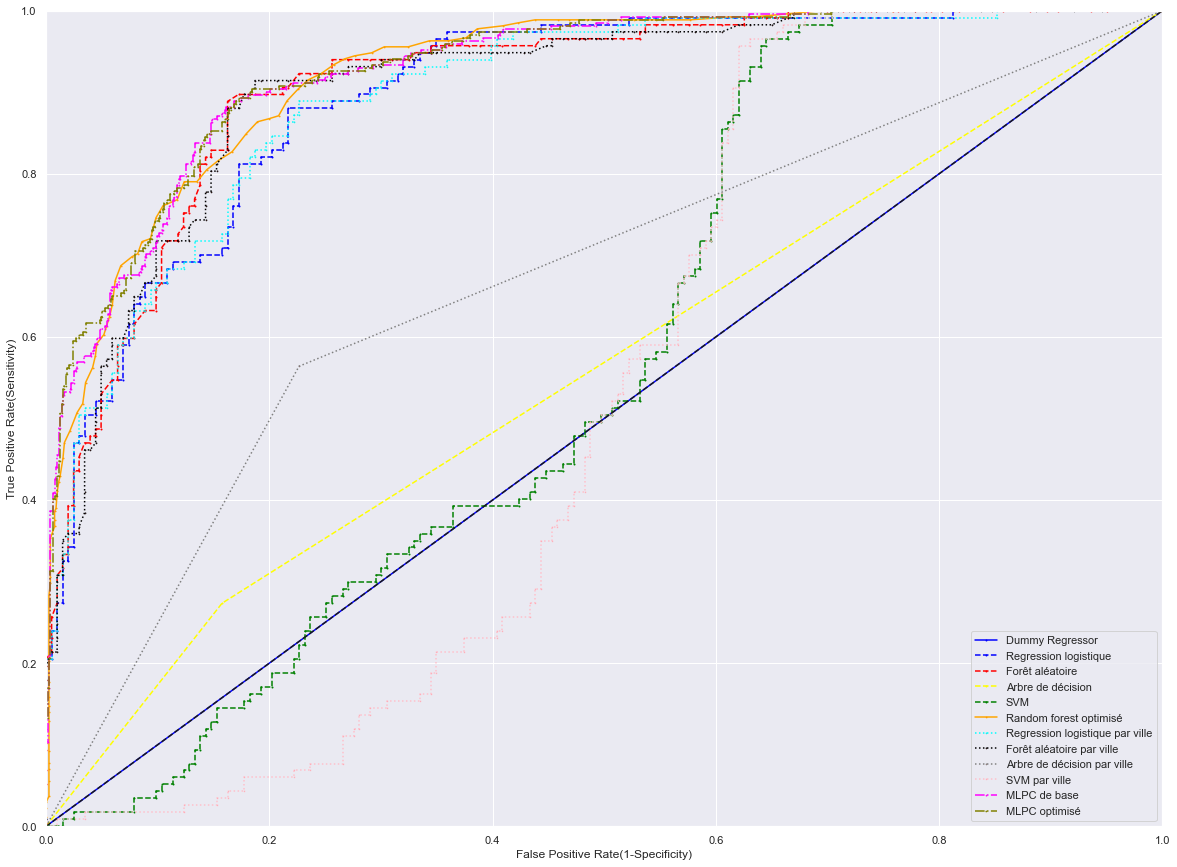

In [124]:
#Comparaison des modèles avec Classification Report 
plt.rcParams["figure.figsize"] = (20,15)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve



plt.rcParams['font.size'] = 12
plt.plot(fpr_dumm, tpr_dumm, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Dummy Regressor")
plt.plot(fpr_lr, tpr_lr, color = 'blue',linestyle ='--', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Regression logistique")
plt.plot(fpr_rf, tpr_rf, color = 'red',linestyle ='--', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Forêt aléatoire")
plt.plot(fpr_dtree, tpr_dtree, color = 'yellow',linestyle ='--', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "Arbre de décision")
plt.plot(fpr_svm, tpr_svm, color = 'green',linestyle ='--', marker = 'o', markerfacecolor = 'red', markersize = 1, label = "SVM")
plt.plot(fpr_rf_opt, tpr_rf_opt, color = 'orange', marker = '<', markerfacecolor = 'red', markersize = 1, label = "Random forest optimisé")
plt.plot(fpr_lr_ville, tpr_lr_ville, color = 'cyan',linestyle =':', marker = 'v', markerfacecolor = 'red', markersize = 1, label = "Regression logistique par ville")
plt.plot(fpr_rf_ville, tpr_rf_ville, color = 'black',linestyle =':', marker = 'v', markerfacecolor = 'red', markersize = 1, label = "Forêt aléatoire par ville")
plt.plot(fpr_dtree_ville, tpr_dtree_ville, color = 'grey',linestyle =':', marker = 'v', markerfacecolor = 'red', markersize = 1, label = "Arbre de décision par ville")
plt.plot(fpr_svm_ville, tpr_svm_ville, color = 'pink',linestyle =':', marker = 'v', markerfacecolor = 'red', markersize = 1, label = "SVM par ville")
plt.plot(fpr_mlpc, tpr_mlpc, color = 'magenta',linestyle ='-.', marker = '^', markerfacecolor = 'red', markersize = 1, label = "MLPC de base")
plt.plot(fpr_mlpc_opt, tpr_mlpc_opt, color = 'olive',linestyle ='-.', marker = '>', markerfacecolor = 'red', markersize = 1, label = "MLPC optimisé")



plt.plot([0,1], [0,1], 'k--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC Curve for rain prediction CLassifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

#Régression

## Baseline : DummyRegressor

In [40]:
df = chargement_data()

In [41]:
df_prepare = chargement_ville('Darwin',df)

In [42]:
df_prepare['Date'] = pd.to_datetime(df_prepare['Date'])

In [43]:
cat_columns, num_columns = separation_colonnes(df_prepare)

In [44]:
df_prepare = encodage(df_prepare,cat_columns)

In [45]:
num_columns = num_columns.drop('Temp9am')

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Séparation entre feature et cible
X = df_prepare.drop(columns=["Temp9am"], axis=1)
y = df_prepare["Temp9am"]


#séparation du jeu de donnée en train et test, on choisi 0.1 car cela représente 1 an de donnée ( 10 ans de données *0.1 = 1 an)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle = False)

#Normalisation
sc = MinMaxScaler()
X_train[num_columns] = sc.fit_transform(X_train[num_columns])
X_test[num_columns] = sc.transform(X_test[num_columns])

from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_test)
y_predict = dummy_regr.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

mean_absolute_percentage_error(y_test, y_predict)
mean_squared_error(y_test,y_predict)

6.814820755701562

In [47]:
test_results = pd.DataFrame(data={'Test Predictions':y_predict, 'Réalité':y_test})
test_result= test_results.reset_index(drop=True)
test_result

,Test Predictions,Réalité
0,26.915226,26.1
1,26.915226,28.7
2,26.915226,29.5
3,26.915226,30.2
4,26.915226,27.1
...,...,...
1592,26.915226,24.8
1593,26.915226,24.8
1594,26.915226,24.8
1595,26.915226,25.4


In [48]:
import joblib
joblib.dump(dummy_regr, "mon_dummy_regr.joblib")

['mon_dummy_regr.joblib']

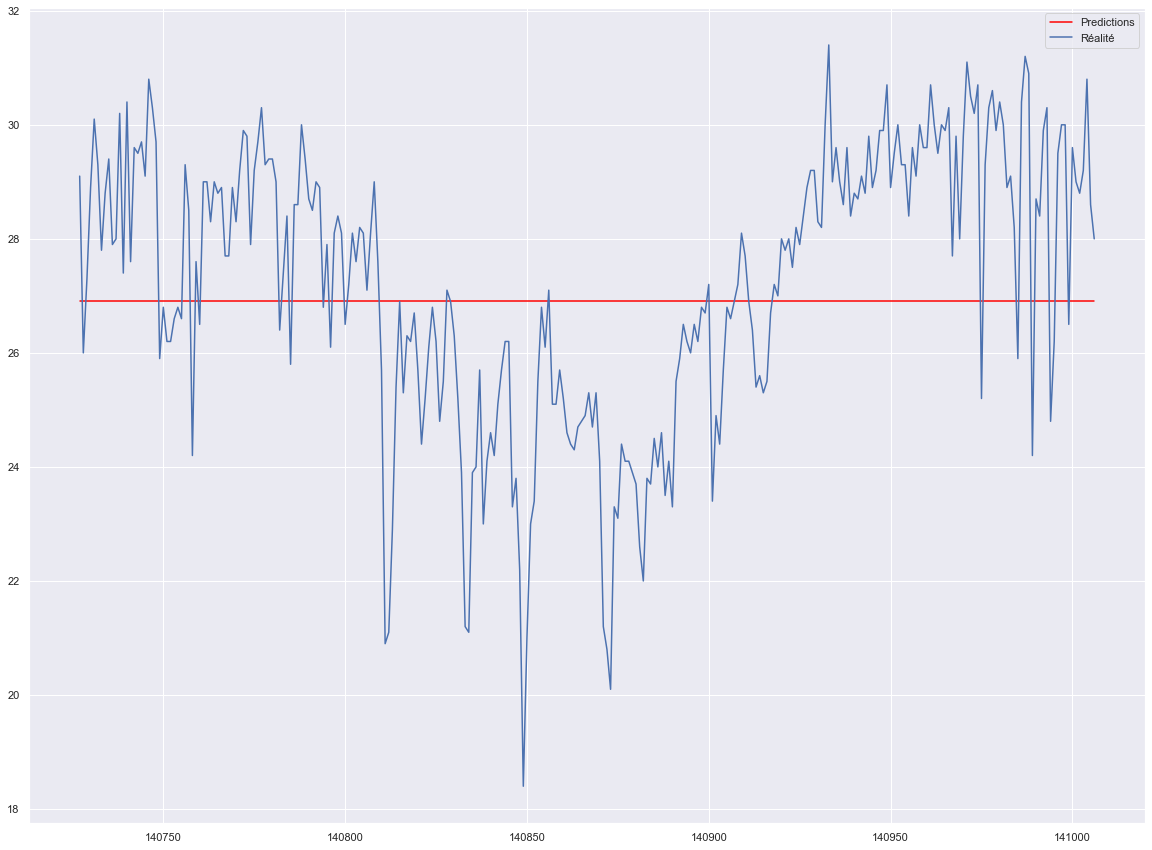

In [49]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

plt.plot(test_results['Test Predictions'][20:300],color='red',label ='Predictions')
plt.plot(test_results['Réalité'][20:300],label='Réalité')
plt.legend()

In [50]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape_dummy = mape(test_results['Réalité'],test_results['Test Predictions'])

## Première itération : Application d’un modèle destiné au série temporelles : SARIMA 

objectifs :

* filtrer sur une ville
* prédire la température
* adapter modèle aux séries temporelles : Sarimax

In [51]:
#import et préparation des données
df = chargement_data_time()
df_prepare = chargement_ville('Albury',df)
cat_columns, num_columns = separation_colonnes(df_prepare)
df_prepare = encodage(df_prepare,cat_columns)
df_prepare.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,0,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
2008-12-02,0,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2008-12-03,0,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
2008-12-04,0,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
2008-12-05,0,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [52]:
from datetime import date
from datetime import timedelta

#ajout des colonnes rain D-1, D-2, D-3
df_prepare.sort_values(['Location', 'Date'], ascending = [True, True])
for ville in pd.unique(df_prepare['Location']):
  df_prepare['Day - 1']=df_prepare.RainToday.shift(1)
  df_prepare['Day - 2']=df_prepare.RainToday.shift(2)
  df_prepare['Day - 3']=df_prepare.RainToday.shift(3)

df_prepare['Day - 1']=df_prepare['Day - 1'].fillna(df_prepare['Day - 1'].mode()[0])
df_prepare['Day - 2']=df_prepare['Day - 2'].fillna(df_prepare['Day - 2'].mode()[0])
df_prepare['Day - 3']=df_prepare['Day - 3'].fillna(df_prepare['Day - 3'].mode()[0])



In [53]:
df_prepare.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day - 1,Day - 2,Day - 3
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,0,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,0.0,0.0,0.0
2008-12-02,0,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,0.0,0.0,0.0
2008-12-03,0,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,0.0,0.0,0.0
2008-12-04,0,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,0.0,0.0,0.0
2008-12-05,0,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,0.0,0.0,0.0


In [54]:
# sélectionne juste temp 
data = df_prepare['MaxTemp']
data.head() 

Date
2008-12-01    13.4
2008-12-02     7.4
2008-12-03    12.9
2008-12-04     9.2
2008-12-05    17.5
Name: MaxTemp, dtype: float64

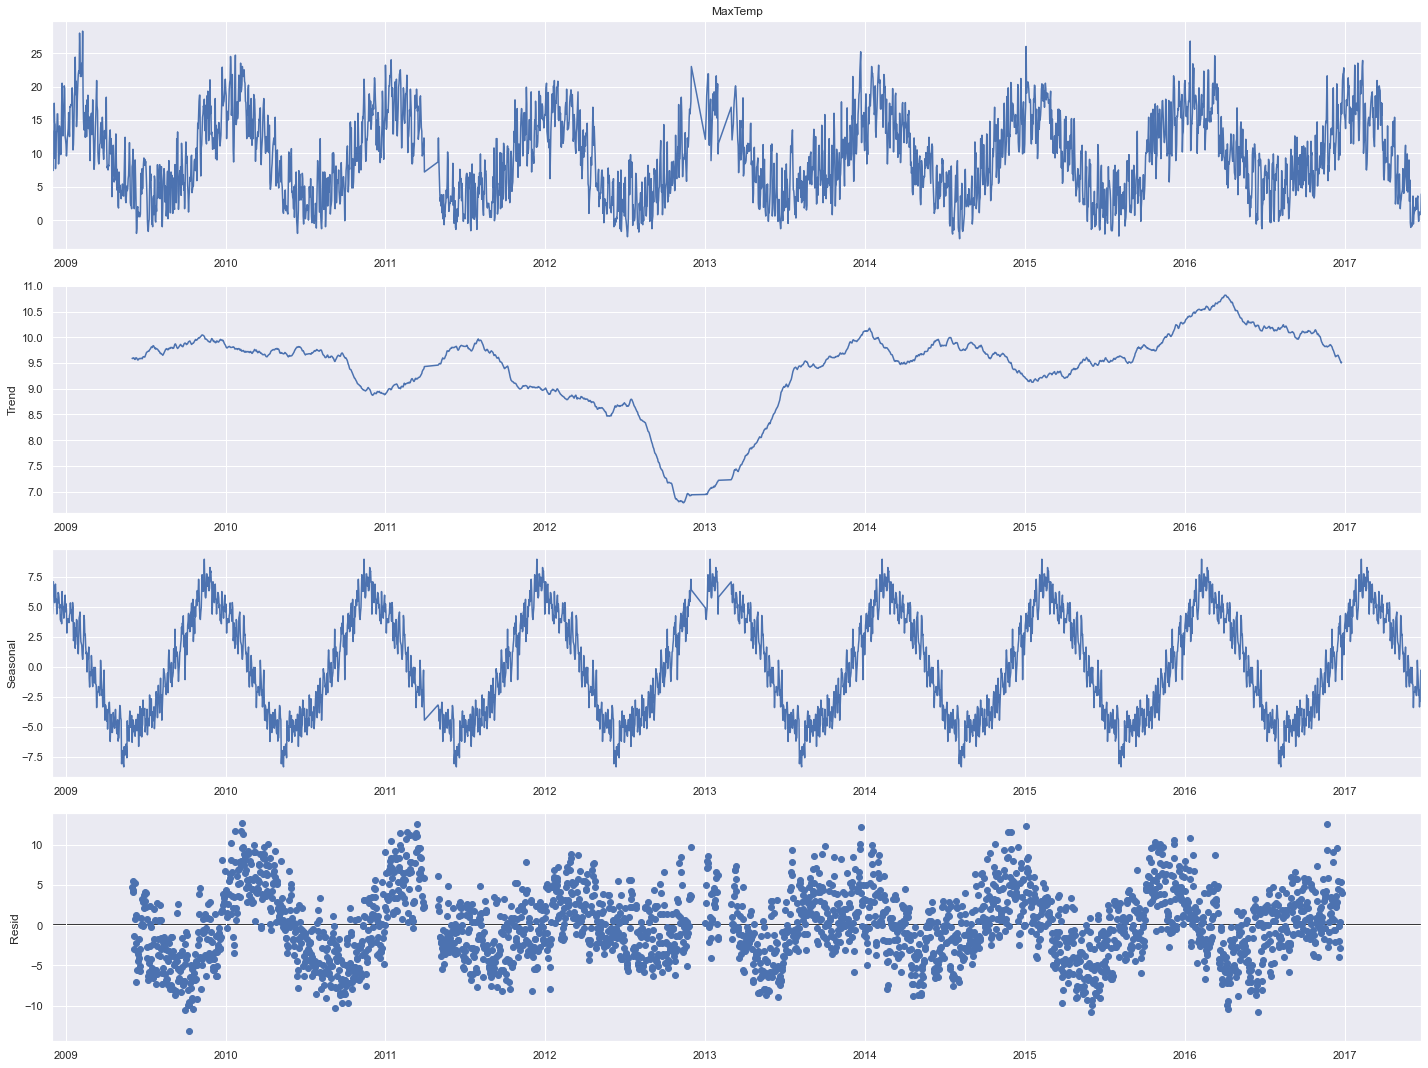

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(data,  period = 365) 
res.plot() 
plt.show() 

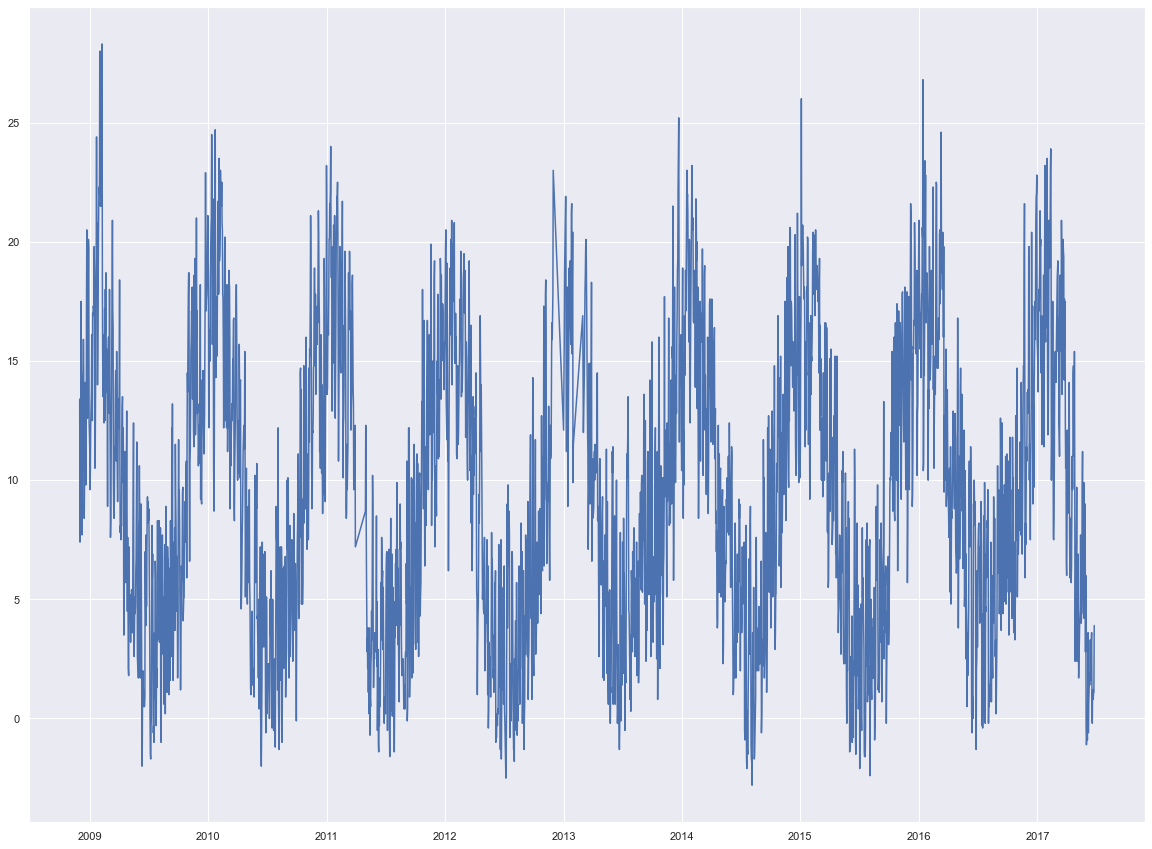

In [56]:
plt.plot(data)

pas de besoin de log la série, elle n'est pas multiplicative

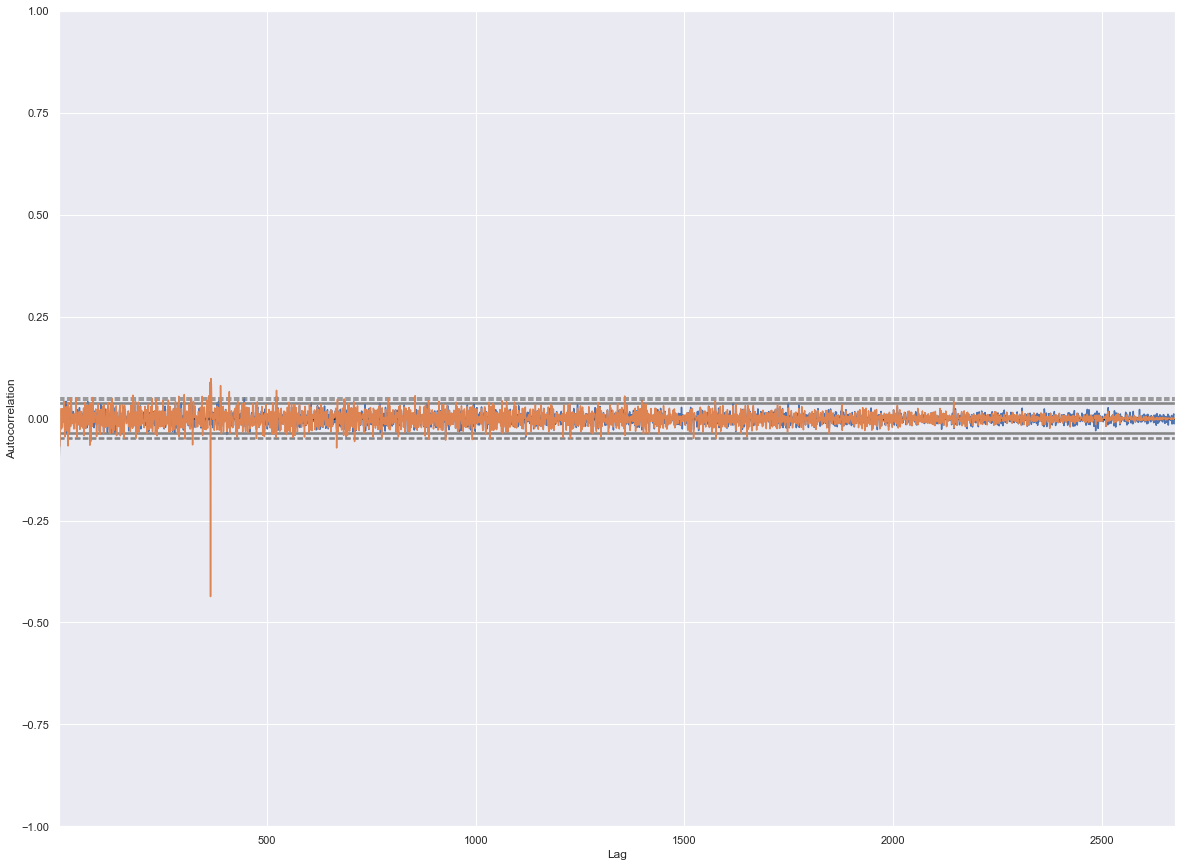

In [57]:
#détermination de d et D
data_1 = data.diff().dropna() 
pd.plotting.autocorrelation_plot(data_1);  
data_2 = data_1.diff(periods = 365).dropna() 
pd.plotting.autocorrelation_plot(data_2);

bon résultats, on peut consédirer que D et d sont =1

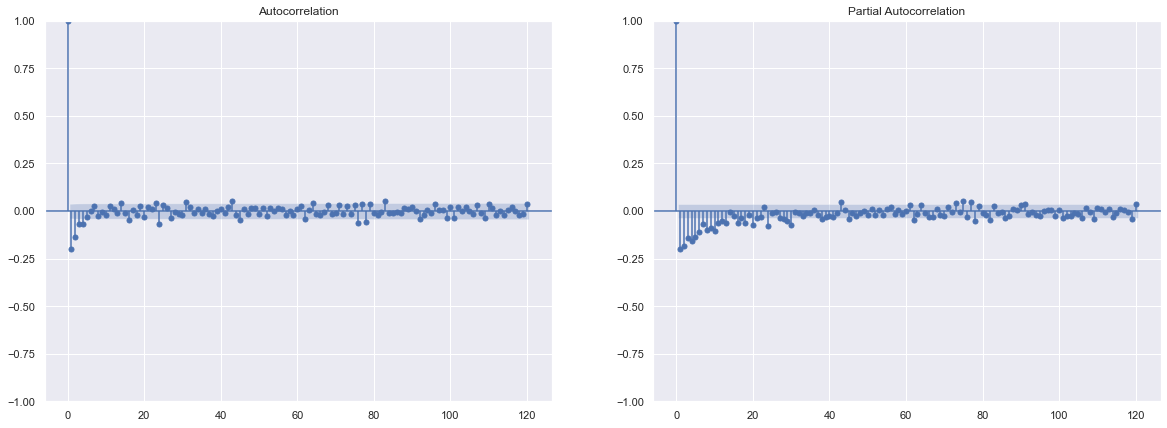

In [58]:
#visualise autocorrélogrammes partiels 
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) 
plot_acf(data_2, lags = 120, ax=ax1) 
plot_pacf(data_2, lags = 120, ax=ax2) 
plt.show() 

on suppose in ARMA(1,1) - à affinner si besoin. On a donc SARIMA(1,1,1,)(X,1,X)
on note que pour ACF, 1 pic à 12 puis s'annulle
on note que pour PACF tendence vers 0 des pics
on peut supposer un modèle MA(1) donc peut supposer modèle SARIMA(1,1,1,)(0,1,1)

In [59]:
# modèle SARIMAX  
# import statsmodels.api as sm
# model=sm.tsa.SARIMAX(data,order=(1,1,1),seasonal_order=(0,1,1,365)) 
# sarima=model.fit() 
# print(sarima.summary()) 

In [60]:
#prédiction sur 12 mois suivant la dernière valeur (nombre de mois dans modele 120 don nombre + 12 mois 132) 
#pred = sarima.predict(120, 132)
# pred = sarima.predict(3040, 3405)
# pred

In [61]:
#Concaténation des prédictions à la série originale 
# datapred = pd.concat([data, pred]) 

In [62]:
#Visualisation 
# plt.plot(datapred)

# # Ajout de la ligne verticale au niveau de la démarcation entre observations et prédictions (on pourra créer un objet datetime avec datetime.date(1960,1,1) pour indiquer l'abscisse) 
# import datetime 
# plt.axvline(x= datetime.date(2017,6,25), color='red'); 

## Deuxième itération : ARMIA

In [63]:
df = chargement_data()

In [64]:
df_prepare = chargement_ville('Darwin',df)

In [65]:
df_ts = df_prepare[['Date','Temp9am']].copy()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts.reset_index(drop=True, inplace=True)
df_ts.set_index('Date', inplace=True)

In [66]:
df_ts.head()

,Temp9am
Date,
2008-07-01,25.4
2008-07-02,24.3
2008-07-03,24.3
2008-07-04,21.3
2008-07-05,22.2


In [67]:
#séparation du jeu de donnée en test train en respectant série temporelle
y_train = df_ts[df_ts.index<'2016-06-24'] #train_df[train_df['ds']<'2016-06-24']
y_test = df_ts[df_ts.index>='2016-06-24']

In [68]:
import math
import scipy as sp
import numpy as np

#data handling
import pandas as pd

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
sns.set()

#machine learning and statistical methods
import statsmodels.api as sm

#dataframe index manipulations
import datetime

#selected preprocessing and evaluation methods
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#muting unnecessary warnings if needed
import warnings


sd_7 = sm.tsa.seasonal_decompose(y_train, period=7)

#extracting yearly seasonality from time series adjusted by daily and weekly seasonality
sd_365 = sm.tsa.seasonal_decompose(y_train - np.array(sd_7.seasonal).reshape(-1,1), period=365)

In [69]:
!pip install pmdarima

In [70]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

In [71]:
arima_st = sm.tsa.arima.ARIMA(df_ts, order=(1, 1, 1),seasonal_order=(0, 1, 1, 365))
results2 = arima_st.fit(method='innovations_mle', low_memory=True, cov_type='none')
print(results2.summary().tables[1])

C:\Users\latti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\latti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\latti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4692        nan        nan        nan         nan         nan
ma.L1         -0.9037        nan        nan        nan         nan         nan
ma.S.L365     -0.8346        nan        nan        nan         nan         nan
sigma2         2.3929        nan        nan        nan         nan         nan


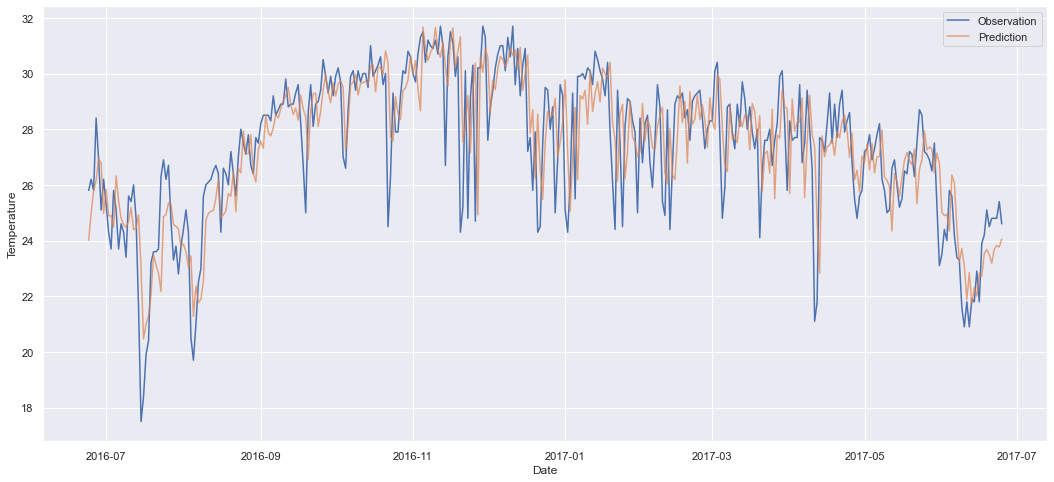

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
pred = results2.get_prediction(start=pd.to_datetime('2016-06-24'), dynamic=False)
pred_ci = pred.conf_int()
ax = plt.plot(y_test,label='Observation')
plt.plot(pred.predicted_mean, label='Prediction', alpha=.7)
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [73]:
train_results = pd.DataFrame(data={'Predictions':pred.predicted_mean})
train_results = train_results.merge(y_test, left_index=True, right_index=True)

In [74]:
train_results

,Predictions,Temp9am
Date,,
2016-06-24,24.009931,25.8
2016-06-25,24.992583,26.2
2016-06-26,25.787337,25.8
2016-06-27,26.156237,28.4
2016-06-28,26.946684,26.9
...,...,...
2017-06-21,23.184723,24.8
2017-06-22,23.684589,24.8
2017-06-23,23.821326,24.8


In [75]:
from sklearn.metrics import mean_absolute_percentage_error
mape_arima = mean_absolute_percentage_error(train_results['Predictions'], train_results['Temp9am'])
print(mape)

<function mean_absolute_percentage_error at 0x000001A16C9A9820>


## Troisième itération :  approche Facebook Prophet

In [9]:
df = chargement_data()

In [10]:
#choix de la ville
df_prepare = chargement_ville('Darwin',df)

In [11]:
df_prepare.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,2008-07-01,Darwin,20.0,20.0,0.0,4.4,11.0,E,41.0,ENE,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,No
139112,2008-07-02,Darwin,19.4,19.4,0.0,6.0,10.4,ENE,50.0,SE,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,No


In [30]:
!pip install pystan==2.19.1.1

In [34]:
!pip install --ignore-installed cmdstanpy==0.9.5

  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
     --------------------------------------- 10.9/10.9 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 8.1 MB/s eta 0:00:00
     -------------------------------------- 500.8/500.8 kB 5.2 MB/s eta 0:00:00
     ------------------------------------- 247.7/247.7 kB 15.8 MB/s eta 0:00:00
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.4 which is incompatible.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.4 which is incompatible.
imbalanced-learn 0.9.1 requires scikit-learn>=1.1.0, but you have scikit-learn 1.0.2 which is incompatible.
aiobotocore 2.3.4 requires botocore<1.24.22,>=1.24.21, but you have botocore 1.27.28 which is incompatible.


In [41]:
!pip uninstall fbprophet

^C


In [42]:
!pip install cmdstanpy==0.9.68
!pip install pystan==2.19.1.1

!pip install prophet

  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.68 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.7 which is incompatible.



  Using cached cmdstanpy-1.0.7-py3-none-any.whl (80 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68


In [37]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [38]:
train_df = pd.DataFrame()
train_df['ds'] = pd.to_datetime(df_prepare['Date'])
train_df['y']=df_prepare['Temp9am']
train_df.head(2)
train_df2 = train_df[train_df['ds']<'2016-06-24']
train_df2.tail(2)


,ds,y
141935,2016-06-22,23.6
141936,2016-06-23,23.9


In [39]:
prophet1 = Prophet(daily_seasonality=True)
prophet1.fit(train_df2)
future = prophet1.make_future_dataframe(periods=365)
future.tail(2)

AttributeError: 'StanModel' object has no attribute 'fit_class'

In [ ]:
forecast = prophet1.predict(future)
forecast.tail()

In [ ]:
forecast.head()

In [ ]:

plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots()

ax.plot(train_df['ds'],train_df['y'],label = "réalité")
ax.plot(forecast['ds'], forecast['yhat'],label = "prédiction")
plt.legend()
plt.show()

In [ ]:
fig1 = plot_plotly(model, forecast)
fig1

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, period='180 days', horizon ='365 days')
df_cv.head()

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_perf = performance_metrics(df_cv)
df_perf.describe()

In [ ]:
# mean absolute percentage error (MAPE) visualised
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(train_df['y'][2:],forecast['yhat'])

In [ ]:
cap = 35
floor=15
train_df2['cap'] = cap
train_df2['floor'] = floor

prophet2 = Prophet(growth='logistic')
prophet2.fit(train_df2)


In [ ]:
future = prophet2.make_future_dataframe(periods=365)
future['cap'] = cap # Saturating maximum
future['floor'] = floor # Saturating minimum
future.tail(2)

In [ ]:
forecast = prophet2.predict(future)
forecast.tail()

In [ ]:
forecast.head()

In [ ]:

plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots()

ax.plot(train_df['ds'],train_df['y'],label = "réalité")
ax.plot(forecast['ds'], forecast['yhat'],label = "prédiction")
plt.legend()
plt.show()

In [ ]:
fig1 = plot_plotly(model, forecast)
fig1

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, period='180 days', horizon ='365 days')
df_cv.head()

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_perf = performance_metrics(df_cv)
df_perf.describe()

In [ ]:
# mean absolute percentage error (MAPE) visualised
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape_prophet = mape(train_df['y'][2:],forecast['yhat'])

## Quatrième itération :  réseau de neurones LSTM

In [ ]:
#import et préparation des données
df = chargement_data()
df_prepare = chargement_ville('Darwin',df)

df_prepare.head()

In [ ]:
train_df = pd.DataFrame()
train_df['ds'] = pd.to_datetime(df_prepare['Date'])
train_df['y']=df_prepare['Temp9am']
train_df.head(2)
train_df2 = train_df[train_df['ds']<'2016-06-24']
train_df2.tail(2)


In [ ]:
df_rnn= train_df


In [ ]:
df_rnn.index = pd.to_datetime(df_rnn['ds'])


In [ ]:
df_rnn.drop(['ds'],axis=1)

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
temp = df_rnn['y']
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

In [ ]:
X_train1, y_train1 = X1[:2900], y1[:2900]
X_val1, y_val1 = X1[2900:3033], y1[2900:3033]
X_test1, y_test1 = X1[3033:], y1[3033:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

lstm_regr = Sequential()
lstm_regr.add(InputLayer((5, 1)))
lstm_regr.add(LSTM(64))
lstm_regr.add(Dense(8, 'relu'))
lstm_regr.add(Dense(1, 'linear'))

lstm_regr.summary()

In [ ]:
import os
os.makedirs('./run/models',   mode=0o750, exist_ok=True)
save_dir = "./run/models/best_model_lstm.h5"
cb_lstm = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir, save_best_only=True)

lstm_regr.compile(optimizer = 'rmsprop', loss = 'mae', metrics = ['mape','mae'] )

In [ ]:
lstm_regr.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cb_lstm])

In [ ]:
from tensorflow.keras.models import load_model
model_lstm = load_model(save_dir)

In [ ]:
from tensorflow import keras
img=keras.utils.plot_model( model_lstm, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=96)
display(img)

In [ ]:
model_lstm.summary()

In [ ]:
score = model_lstm.evaluate(X_test1, y_test1, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mape       : {:5.4f}'.format(score[1]))
print('x_test / mae       : {:5.4f}'.format(score[2]))

In [ ]:
train_predictions = model_lstm.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Predictions':train_predictions, 'Réalité':y_train1})
train_results

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

plt.plot(train_results['Predictions'][20:300],color='yellow',label ='Predictions')
plt.plot(train_results['Réalité'][20:300],label='Réalité')
plt.legend()

In [ ]:
val_predictions = model_lstm.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Réalité':y_val1})
val_results

In [ ]:
plt.plot(val_results['Val Predictions'][:100],label='Predictions')
plt.plot(val_results['Réalité'][:100],label='Réalité')
plt.legend()

In [ ]:
test_predictions = model_lstm.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Réalité':y_test1})
test_results

In [ ]:
test_predictions.shape

In [ ]:
plt.plot(test_results['Test Predictions'][:155],label='Predictions')
plt.plot(test_results['Réalité'][:155],label='Réalité')
plt.legend()

In [ ]:
mape_lstm = mape(y_test1,test_predictions)

## Bilan

In [ ]:
import seaborn as snNew
import matplotlib.pyplot as pltNew

labels = ['DummyRegressor','Facebook Prophet','ARIMA','LSTM']
value =  [mape_dummy*100,mape_prophet*100,mape_arima*100,mape_lstm*100]
fig = snNew.barplot(x=value,y=labels)
fig.set_xlabel("MAPE en %", fontsize = 20)
fig.set_ylabel("Modèle", fontsize = 20)
pltNew.show()